In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sys
import joblib

tipodoaquivo = joblib.load('tipodoarquivo.pkl')
display(tipodoaquivo)


'.pdf'

In [11]:
df = pd.read_csv("planilhas/estadosMedia.csv", sep=";")
total_linhas = len(df)
display(df)

estados_norte = ['AC', 'AL', 'AM', 'AP', 'PA', 'RO', 'RR', 'TO']
estados_nordeste = ['BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE']
estados_centro_oeste = ['DF', 'GO', 'MS', 'MT']
estados_sudeste = ['ES', 'MG', 'RJ', 'SP']
estados_sul = ['PR', 'RS', 'SC']

dfNorte = df[df['uf'].isin(estados_norte)]
dfNordeste = df[df['uf'].isin(estados_nordeste)]
dfCentroOeste = df[df['uf'].isin(estados_centro_oeste)]
dfSudeste = df[df['uf'].isin(estados_sudeste)]
dfSul = df[df['uf'].isin(estados_sul)]

# Filtrando os DataFrames regionais e adicionando a coluna de região
dfNorte = df[df['uf'].isin(estados_norte)].copy()
dfNorte['regiao'] = 'Norte'

dfNordeste = df[df['uf'].isin(estados_nordeste)].copy()
dfNordeste['regiao'] = 'Nordeste'

dfCentroOeste = df[df['uf'].isin(estados_centro_oeste)].copy()
dfCentroOeste['regiao'] = 'Centro-Oeste'

dfSudeste = df[df['uf'].isin(estados_sudeste)].copy()
dfSudeste['regiao'] = 'Sudeste'

dfSul = df[df['uf'].isin(estados_sul)].copy()
dfSul['regiao'] = 'Sul'

# Concatenando todos os DataFrames regionais
dfRegioes = pd.concat([dfNorte, dfNordeste, dfCentroOeste, dfSudeste, dfSul], ignore_index=True)

# Selecionando apenas colunas numéricas para calcular a média
df_numericos = dfRegioes.select_dtypes(include='number')

# Agrupando por região e calculando a média dos valores numéricos
dfRegiao = dfRegioes.groupby('regiao').mean(numeric_only=True)
dfRegiao = dfRegiao.reset_index()
dfRegiao.rename(columns={'regiao': 'uf'}, inplace=True)

# Exibindo o DataFrame resultante
display(dfRegiao)

,uf,TXApro_Total_2017,TXApro_1aSERIE_2017,TXApro_2aSERIE_2017,TXApro_3aSERIE_2017,TXApro_4aSERIE_2017,Indicador de Rendimento (P)_2017,TXApro_Total_2019,TXApro_1aSERIE_2019,TXApro_2aSERIE_2019,...,saeb_Media_padronizada_2021,saeb_Mat_2023,saeb_Port_2023,saeb_Media_padronizada_2023,IDEB_2017,IDEB_2019,IDEB_2021,IDEB_2023,Meta_2019,Meta_2021
0,AC,87.491,82.217,88.809,93.383,95.750,0.878,85.213,80.095,86.344,...,4.739,263.566,266.258,4.377,3.985,3.944,4.573,3.954,4.204,4.326
1,AL,85.791,80.808,87.305,91.769,89.610,0.862,87.848,83.153,88.665,...,4.105,258.430,259.378,4.202,3.662,3.764,3.824,3.988,3.873,4.041
2,AM,85.350,81.674,84.934,90.172,NaN,0.852,84.054,81.190,83.502,...,3.967,252.807,255.731,4.068,3.585,3.592,3.773,3.711,3.790,3.929
3,AP,76.463,69.628,79.254,84.307,91.580,0.765,77.492,71.414,79.009,...,NaN,250.412,258.657,4.079,3.589,3.266,NaN,3.662,3.796,3.728
4,BA,74.634,65.843,77.621,84.858,80.130,0.745,78.889,71.333,81.261,...,4.379,252.924,256.475,4.081,3.278,3.477,4.030,3.772,3.507,3.675
5,CE,89.368,85.478,89.775,94.542,100.000,0.896,92.852,89.722,92.989,...,4.659,274.246,276.733,4.684,4.073,4.428,4.579,4.566,4.281,4.499
6,DF,83.550,77.598,86.491,90.043,NaN,0.839,82.801,76.534,85.395,...,4.759,270.116,275.822,4.612,5.141,4.176,4.261,4.112,5.335,4.904
7,ES,87.477,80.764,89.119,95.830,94.088,0.878,90.080,85.616,91.244,...,5.073,282.890,283.565,4.908,4.566,4.685,4.808,4.741,4.775,4.922
8,GO,92.999,90.497,92.705,96.100,90.150,0.930,93.184,90.372,93.943,...,4.621,279.804,282.744,4.852,4.368,4.659,4.511,4.788,4.578,4.776
9,MA,86.603,82.760,87.437,91.121,NaN,0.867,90.800,89.078,90.483,...,3.884,248.866,251.401,3.948,3.457,3.560,3.592,3.678,3.669,3.789


,uf,TXApro_Total_2017,TXApro_1aSERIE_2017,TXApro_2aSERIE_2017,TXApro_3aSERIE_2017,TXApro_4aSERIE_2017,Indicador de Rendimento (P)_2017,TXApro_Total_2019,TXApro_1aSERIE_2019,TXApro_2aSERIE_2019,...,saeb_Media_padronizada_2021,saeb_Mat_2023,saeb_Port_2023,saeb_Media_padronizada_2023,IDEB_2017,IDEB_2019,IDEB_2021,IDEB_2023,Meta_2019,Meta_2021
0,Centro-Oeste,83.206500,77.825500,85.504000,90.172000,87.916667,0.836500,83.026750,77.799750,84.955750,...,4.714500,270.904250,275.454500,4.617750,4.426250,4.216000,4.440000,4.363750,4.637500,4.613250
1,Nordeste,82.398250,76.321250,84.174500,89.977000,92.709667,0.826500,84.819375,79.239875,86.141250,...,4.403250,262.651500,265.733625,4.356375,3.761000,3.833250,4.148125,4.028875,3.978375,4.089375
2,Norte,83.565875,78.057125,85.271875,89.990250,93.003571,0.838250,83.996250,79.186125,85.258125,...,4.335143,256.378875,258.743375,4.163625,3.750125,3.660125,4.084571,3.881375,3.960625,4.020125
3,Sudeste,84.655000,78.369500,86.013000,92.589500,91.839000,0.848250,86.882500,81.603250,87.889500,...,4.678000,270.987250,275.803500,4.624500,4.183750,4.305000,4.460750,4.271250,4.395750,4.524500
4,Sul,79.784667,73.553667,80.871667,87.434333,92.001000,0.798333,83.242667,76.916333,85.184333,...,4.942000,279.908000,283.162333,4.859667,4.141333,4.369333,4.594000,4.389667,4.353333,4.517667


In [12]:
print(dfRegiao.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 43 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   uf                                5 non-null      object 
 1   TXApro_Total_2017                 5 non-null      float64
 2   TXApro_1aSERIE_2017               5 non-null      float64
 3   TXApro_2aSERIE_2017               5 non-null      float64
 4   TXApro_3aSERIE_2017               5 non-null      float64
 5   TXApro_4aSERIE_2017               5 non-null      float64
 6   Indicador de Rendimento (P)_2017  5 non-null      float64
 7   TXApro_Total_2019                 5 non-null      float64
 8   TXApro_1aSERIE_2019               5 non-null      float64
 9   TXApro_2aSERIE_2019               5 non-null      float64
 10  TXApro_3aSERIE_2019               5 non-null      float64
 11  TXApro_4aSERIE_2019               5 non-null      float64
 12  Indicador de

# ARPOVAÇÃO TOTAL

In [13]:
dfTaxaAprovTotal = df[['uf', 'TXApro_Total_2017', 'TXApro_Total_2019', 'TXApro_Total_2021', 'TXApro_Total_2023']]

display(dfTaxaAprovTotal)

,uf,TXApro_Total_2017,TXApro_Total_2019,TXApro_Total_2021,TXApro_Total_2023
0,AC,87.491,85.213,87.559,89.203
1,AL,85.791,87.848,87.788,94.245
2,AM,85.350,84.054,91.358,89.637
3,AP,76.463,77.492,75.254,86.576
4,BA,74.634,78.889,87.002,91.535
5,CE,89.368,92.852,97.779,97.043
6,DF,83.550,82.801,84.159,85.607
7,ES,87.477,90.080,92.168,96.101
8,GO,92.999,93.184,97.178,98.389
9,MA,86.603,90.800,88.536,92.090


In [14]:

def graficoLinhaAprovTotal(df, titulo, nomeSalvarArquivo):
    # Configurar o gráfico
    plt.figure(figsize=(12, 6))

    # Plotar cada UF
    for index, row in df.iterrows():
        plt.plot(['2017', '2019', '2021', '2023'], 
                [row['TXApro_Total_2017'], row['TXApro_Total_2019'], row['TXApro_Total_2021'], row['TXApro_Total_2023']],
                label=row['uf'])

    # Adicionar títulos e labels
    plt.title(titulo)
    plt.xlabel('Ano')
    plt.ylabel('Taxa de Aprovação Total')
    plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.yticks(range(70, 101, 5))

    # Ajustar o layout
    plt.tight_layout()

    nome = 'graficos/uf/' + 'linha'+ 'AprovTotal' +nomeSalvarArquivo + tipodoaquivo
    plt.savefig(nome, dpi=300, bbox_inches = "tight")
    # Mostrar o gráfico
    plt.show()

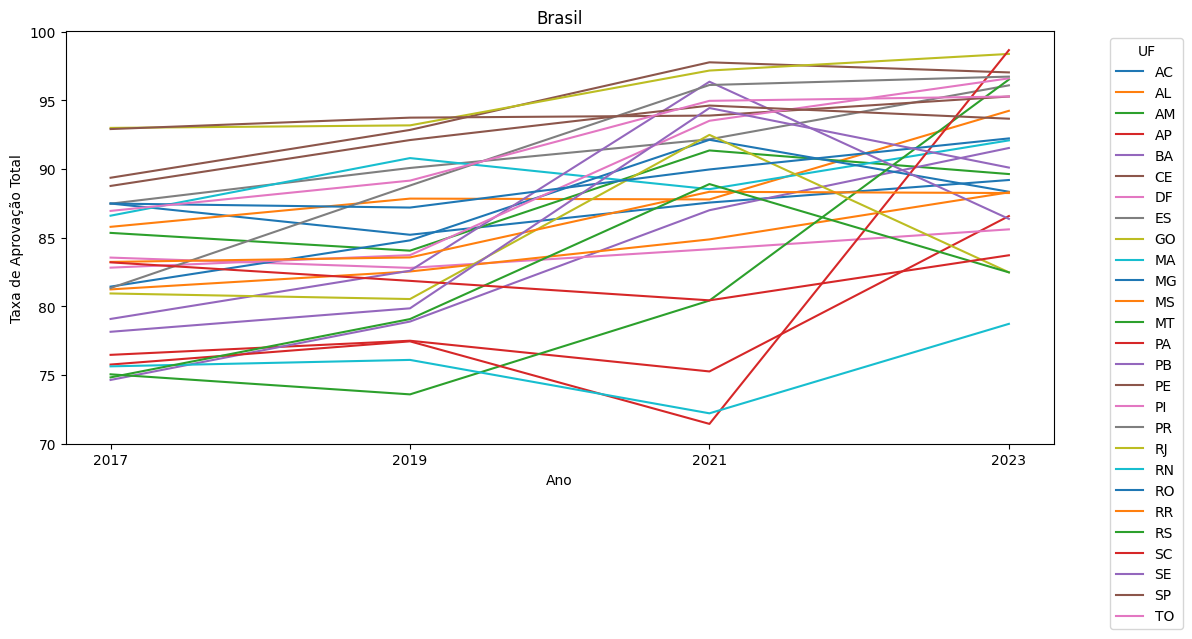

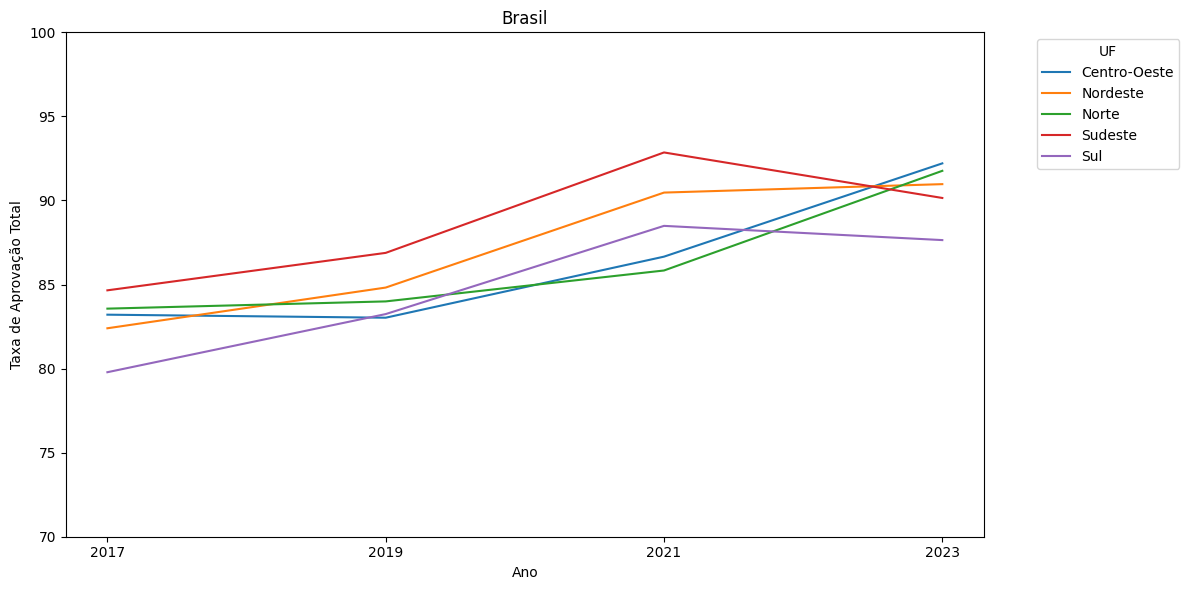

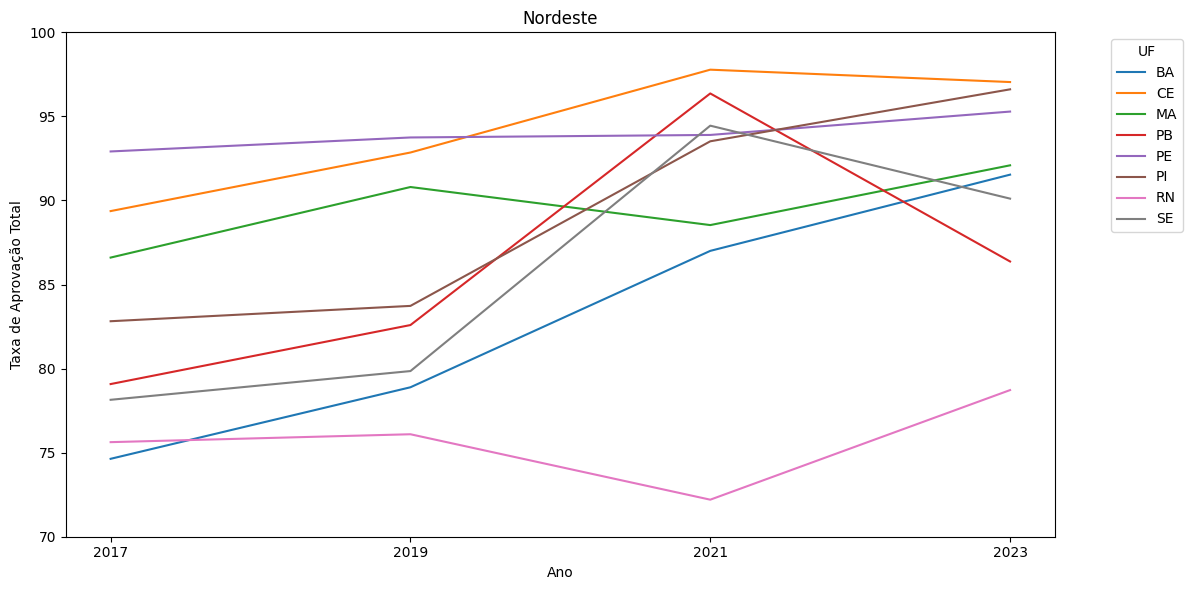

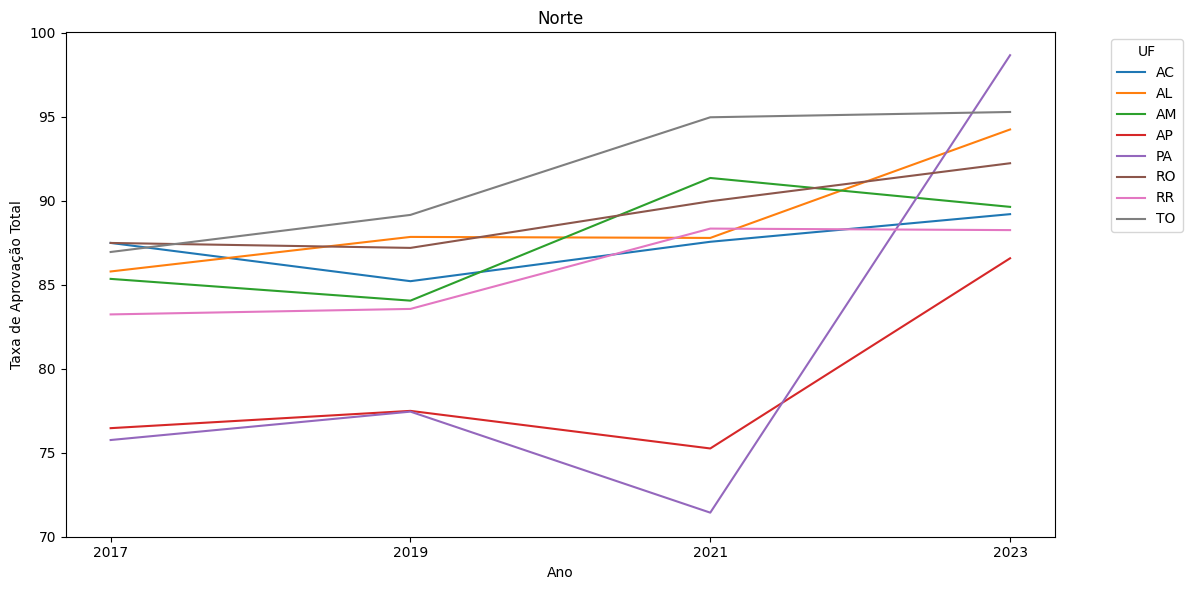

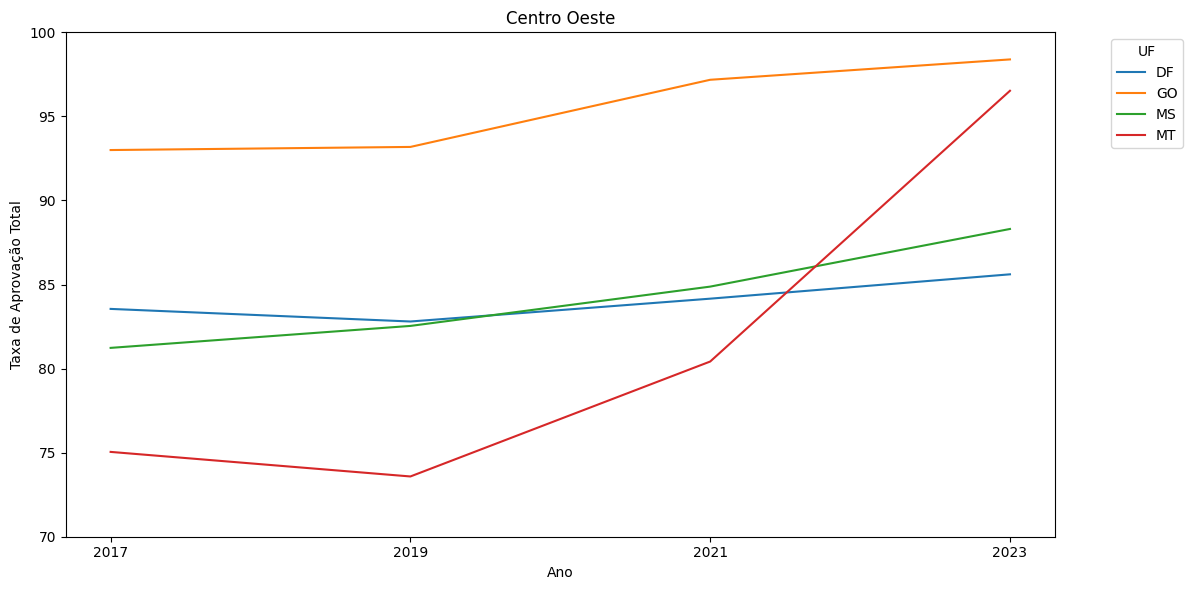

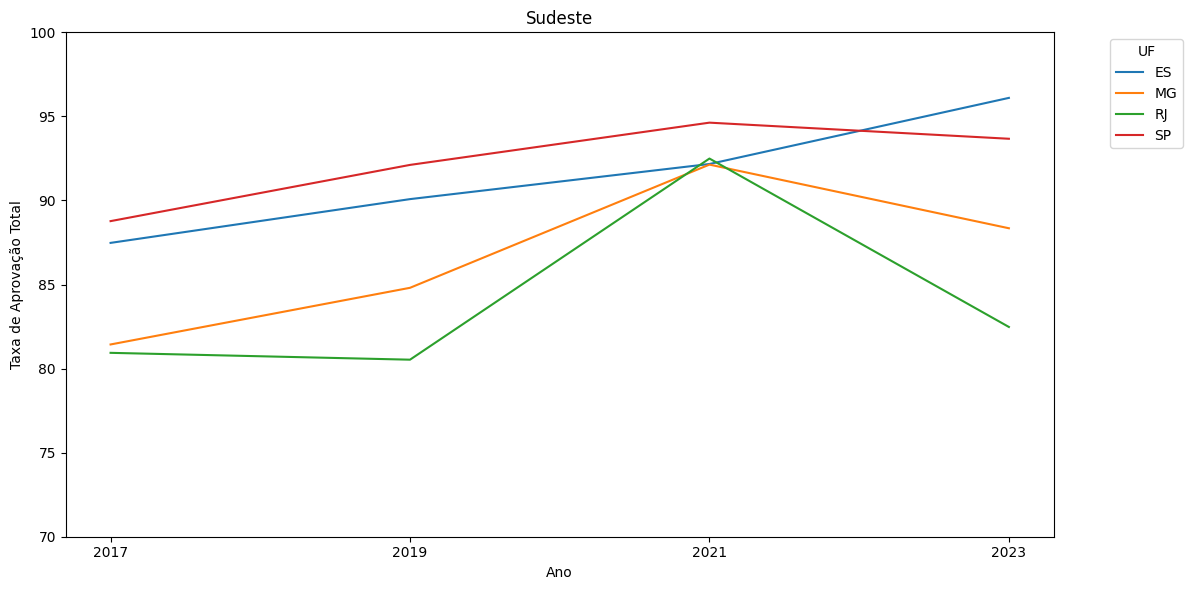

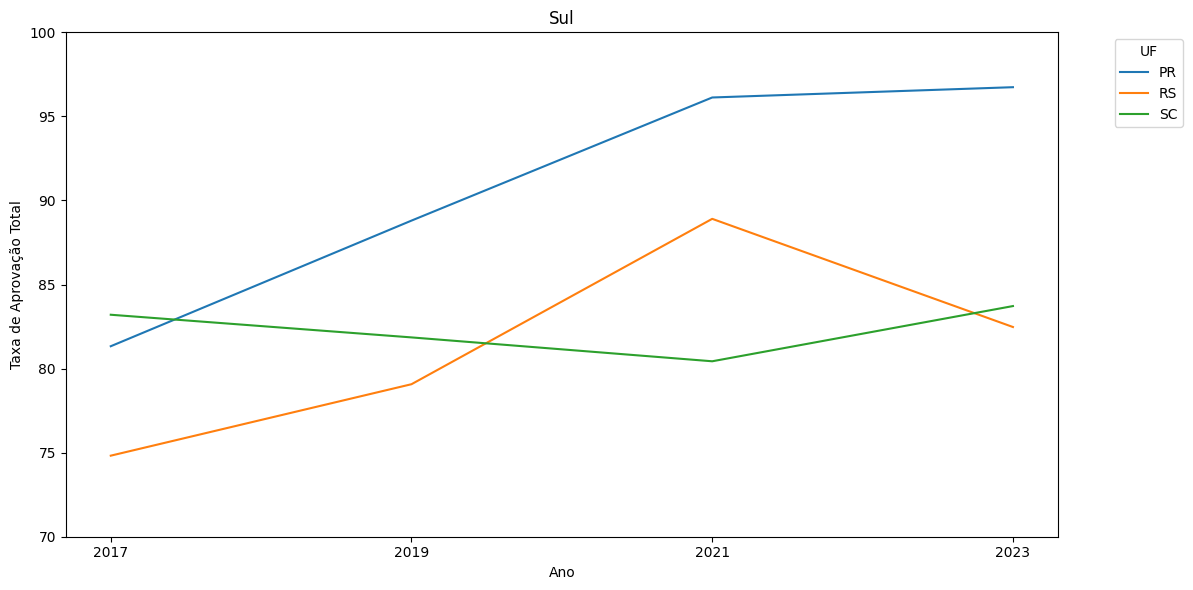

In [15]:
graficoLinhaAprovTotal(df, 'Brasil', 'brasil')
graficoLinhaAprovTotal(dfRegiao, 'Brasil', 'Regiões')
graficoLinhaAprovTotal(dfNordeste, 'Nordeste', 'dfNordeste')
graficoLinhaAprovTotal(dfNorte, 'Norte', 'dfNorte')
graficoLinhaAprovTotal(dfCentroOeste, 'Centro Oeste', 'dfCentroOeste')
graficoLinhaAprovTotal(dfSudeste, 'Sudeste', 'dfSudeste')
graficoLinhaAprovTotal(dfSul, 'Sul', 'dfSul')


# IDEB


In [16]:
dfTaxaIdebTotal = df[['uf', 'IDEB_2017', 'IDEB_2019', 'IDEB_2021', 'IDEB_2023']]

display(dfTaxaIdebTotal)

,uf,IDEB_2017,IDEB_2019,IDEB_2021,IDEB_2023
0,AC,3.985,3.944,4.573,3.954
1,AL,3.662,3.764,3.824,3.988
2,AM,3.585,3.592,3.773,3.711
3,AP,3.589,3.266,NaN,3.662
4,BA,3.278,3.477,4.030,3.772
5,CE,4.073,4.428,4.579,4.566
6,DF,5.141,4.176,4.261,4.112
7,ES,4.566,4.685,4.808,4.741
8,GO,4.368,4.659,4.511,4.788
9,MA,3.457,3.560,3.592,3.678


In [17]:
def graficoLinhaIdebTotal(df, titulo, nomeSalvarArquivo):
    # Configurar o gráfico
    plt.figure(figsize=(12, 6))

    # Plotar cada UF
    for index, row in df.iterrows():
        plt.plot(['2017', '2019', '2021', '2023'], 
                [row['IDEB_2017'], row['IDEB_2019'], row['IDEB_2021'], row['IDEB_2023']],
                label=row['uf'])

    # Adicionar títulos e labels
    plt.title(titulo)
    plt.xlabel('Ano')
    plt.ylabel('Taxa de Aprovação Total')
    plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.yticks(np.arange(3, 6, 0.5))

    # Ajustar o layout
    plt.tight_layout()

    nome = 'graficos/uf/' + 'linha' + 'Ideb'+ nomeSalvarArquivo + tipodoaquivo
    plt.savefig(nome, dpi=300, bbox_inches = "tight")
    # Mostrar o gráfico
    plt.show()

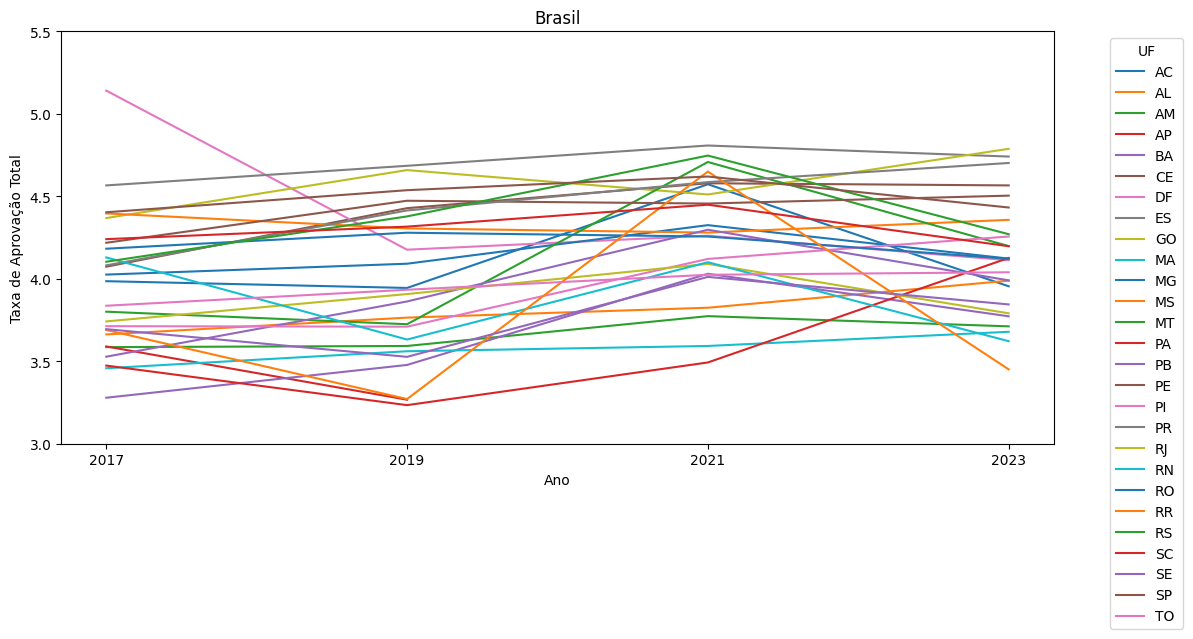

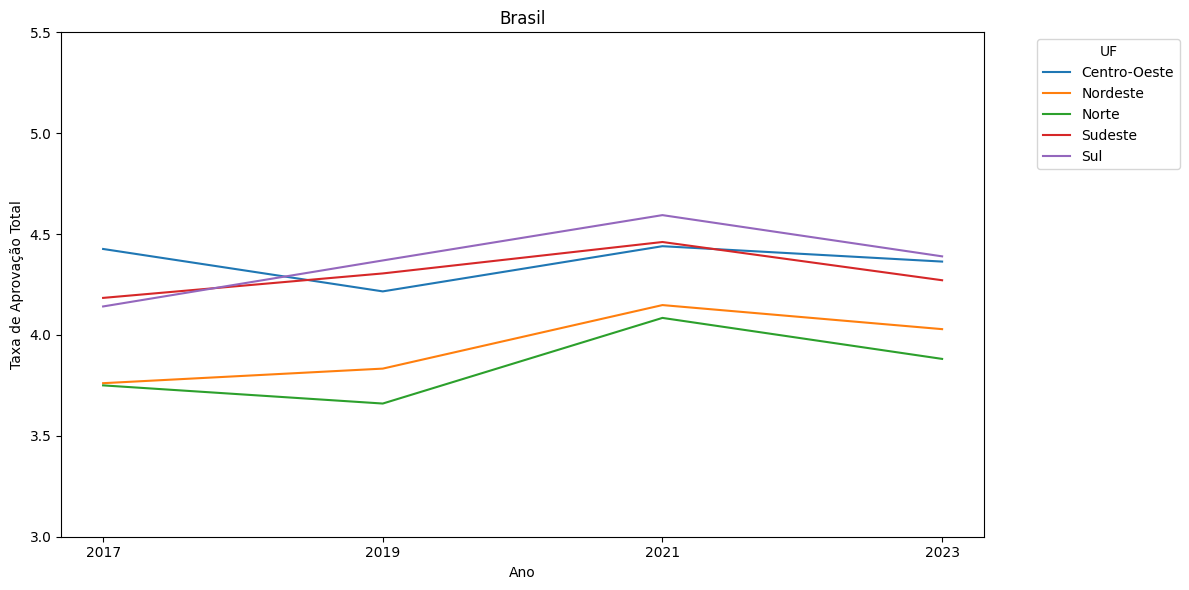

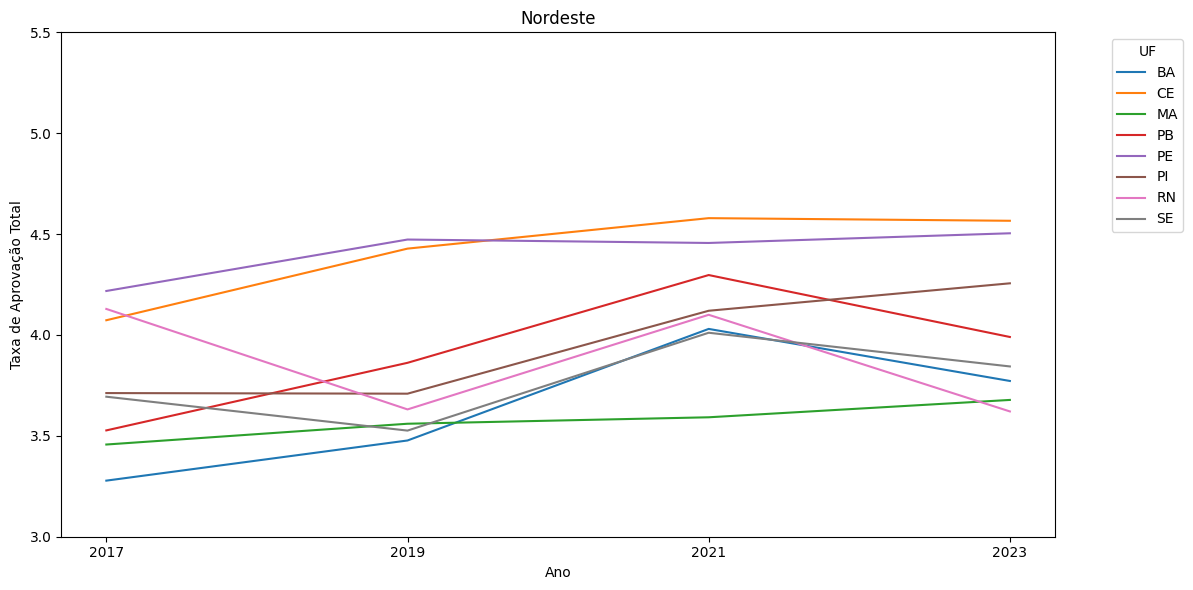

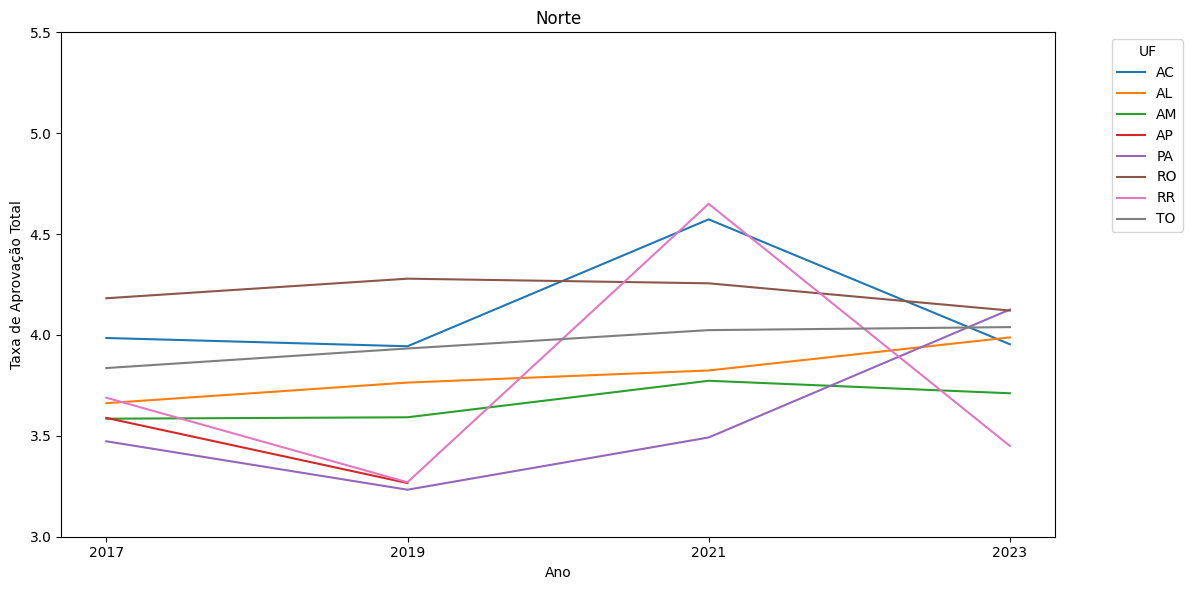

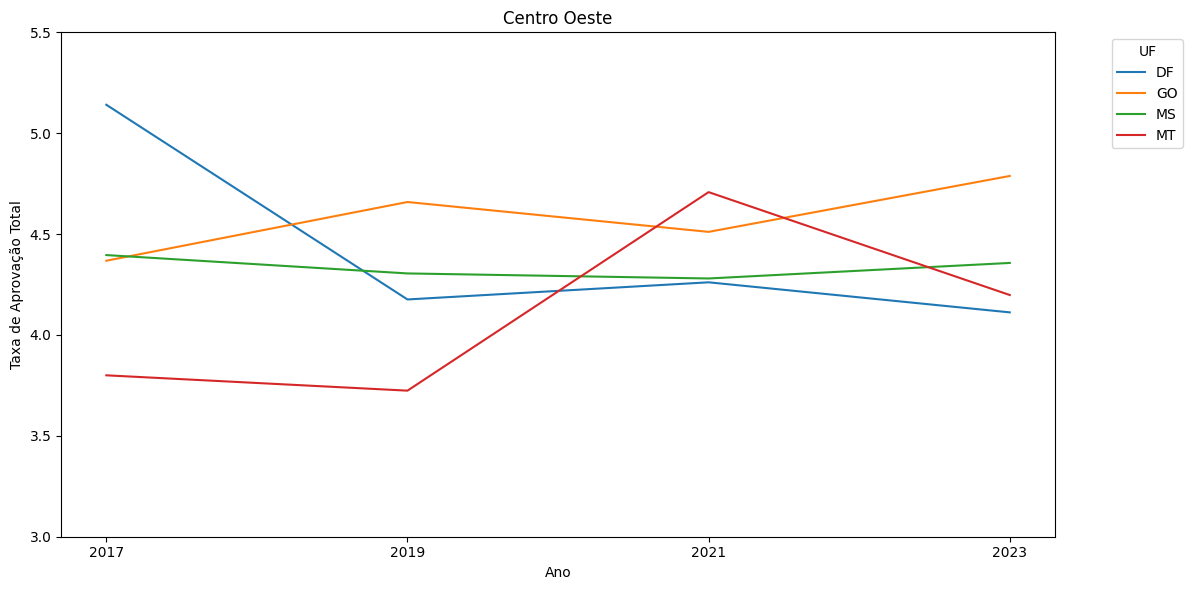

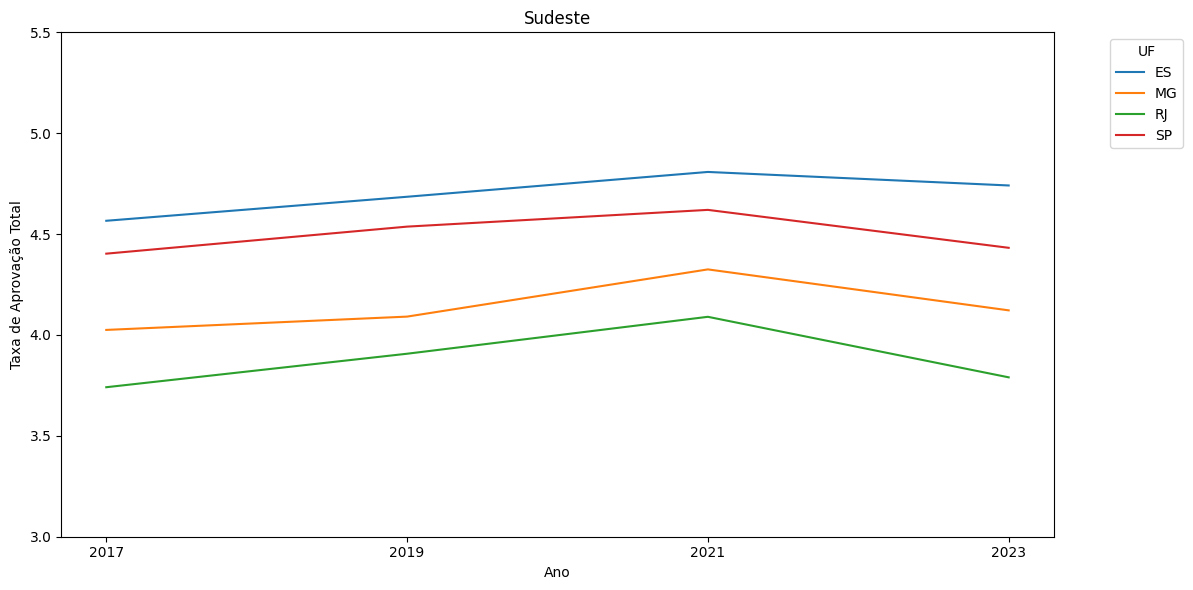

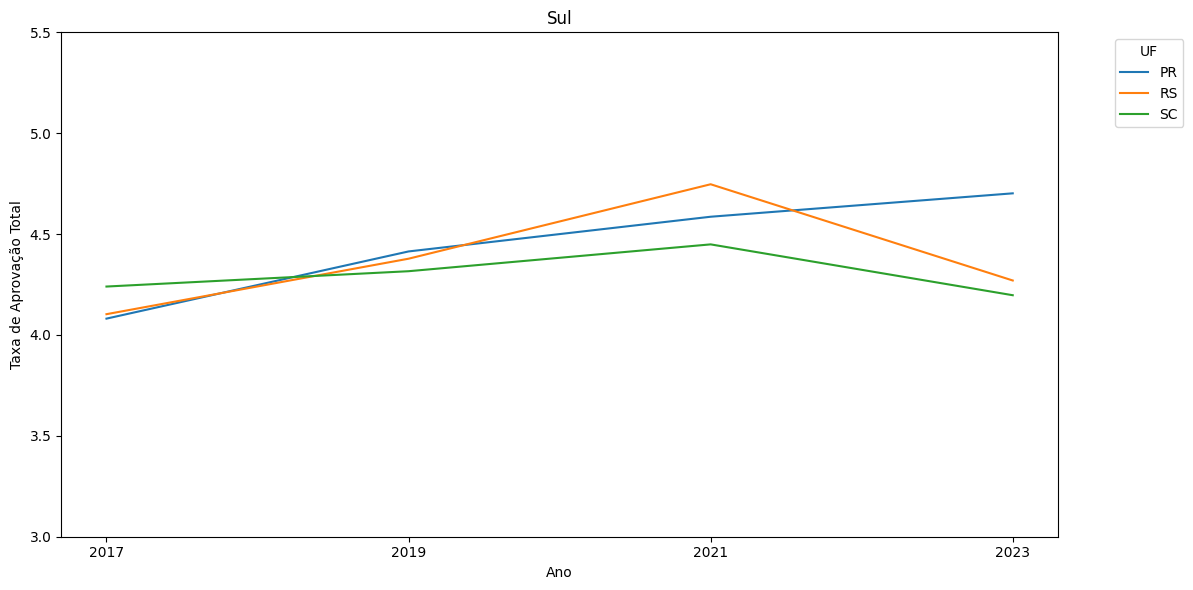

In [18]:
graficoLinhaIdebTotal(df, 'Brasil', 'brasil')
graficoLinhaIdebTotal(dfRegiao, 'Brasil', 'Regiões')
graficoLinhaIdebTotal(dfNordeste, 'Nordeste', 'dfNordeste')
graficoLinhaIdebTotal(dfNorte, 'Norte', 'dfNorte')
graficoLinhaIdebTotal(dfCentroOeste, 'Centro Oeste', 'dfCentroOeste')
graficoLinhaIdebTotal(dfSudeste, 'Sudeste', 'dfSudeste')
graficoLinhaIdebTotal(dfSul, 'Sul', 'dfSul')


# Indicator Rendimento


In [19]:
dfIndicadorRendimento = df[['uf', 'Indicador de Rendimento (P)_2017', 
                       'Indicador de Rendimento (P)_2019', 
                       'Indicador de Rendimento (P)_2021', 
                       'Indicador de Rendimento (P)_2023']]

display(dfIndicadorRendimento)

def graficoIndicadorRend(df, titulo, nomeSalvarArquivo):
    # Configurar o gráfico
    plt.figure(figsize=(12, 6))

    # Plotar cada UF
    for index, row in df.iterrows():
        plt.plot(['2017', '2019', '2021', '2023'], 
                [row['Indicador de Rendimento (P)_2017'], row['Indicador de Rendimento (P)_2019'], row['Indicador de Rendimento (P)_2021'], row['Indicador de Rendimento (P)_2023']],
                label=row['uf'])

    # Adicionar títulos e labels
    plt.title(titulo)
    plt.xlabel('Ano')
    plt.ylabel('Indicador de Rendimento (P)')
    plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.yticks(np.arange(.7, 1, 0.05))

    # Ajustar o layout
    plt.tight_layout()

    nome = 'graficos/uf/' + 'linha'+ 'IndicadorRendimento' +nomeSalvarArquivo + tipodoaquivo
    plt.savefig(nome, dpi=300, bbox_inches = "tight")
    # Mostrar o gráfico
    plt.show()

,uf,Indicador de Rendimento (P)_2017,Indicador de Rendimento (P)_2019,Indicador de Rendimento (P)_2021,Indicador de Rendimento (P)_2023
0,AC,0.878,0.852,0.877,0.895
1,AL,0.862,0.883,0.882,0.943
2,AM,0.852,0.840,0.912,0.896
3,AP,0.765,0.779,0.752,0.868
4,BA,0.745,0.791,0.866,0.912
5,CE,0.896,0.929,0.978,0.971
6,DF,0.839,0.832,0.844,0.854
7,ES,0.878,0.906,0.923,0.963
8,GO,0.930,0.936,0.972,0.984
9,MA,0.867,0.908,0.884,0.921


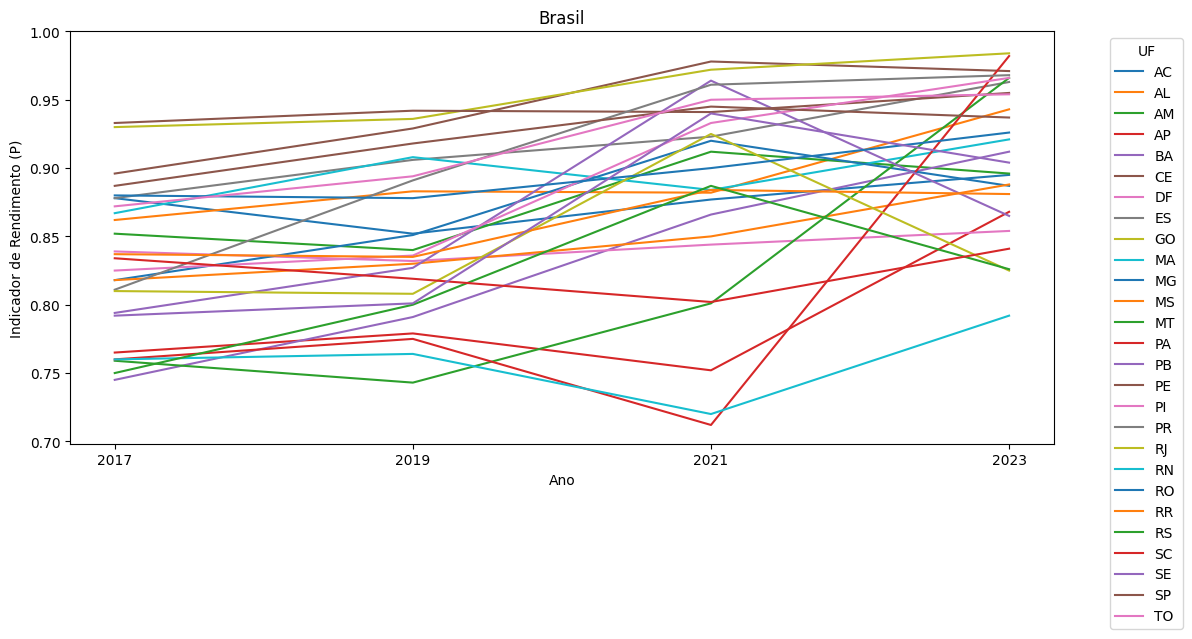

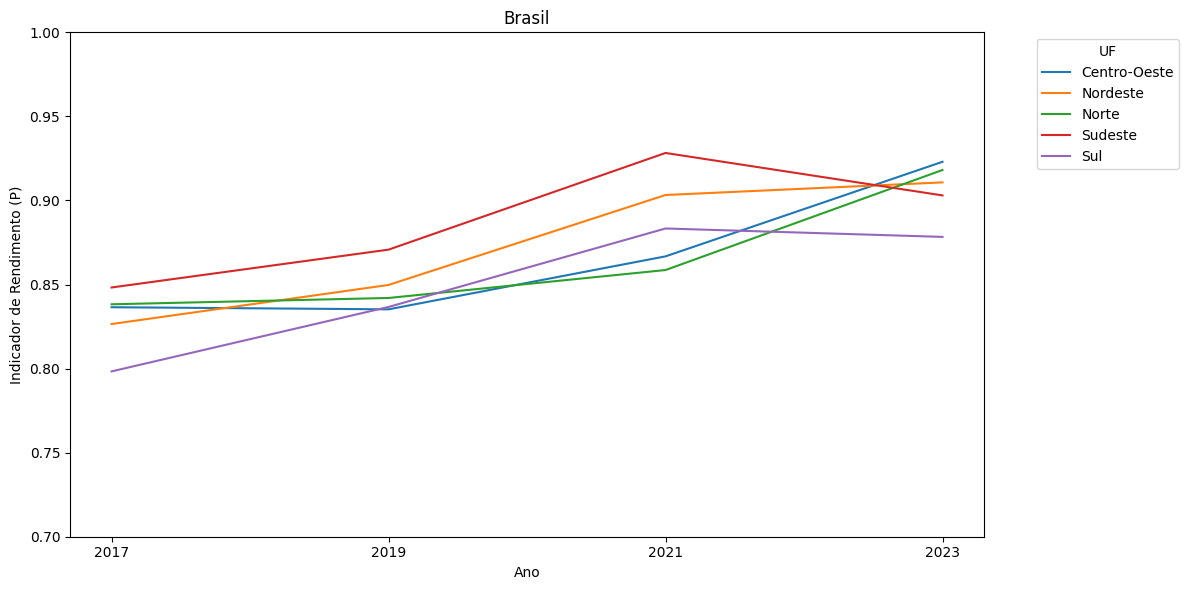

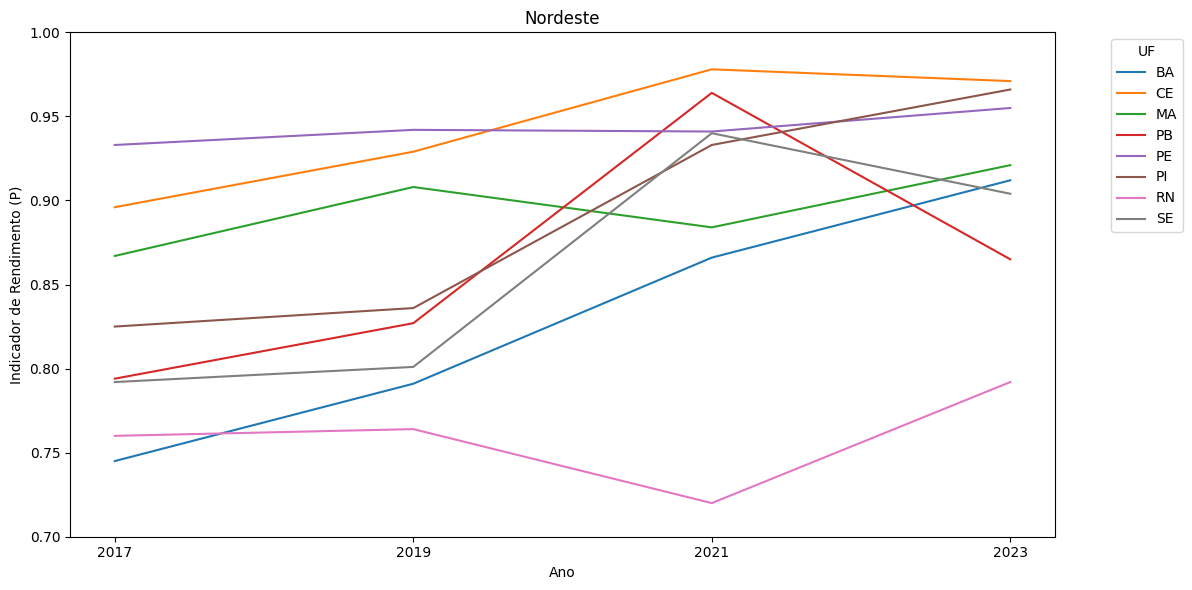

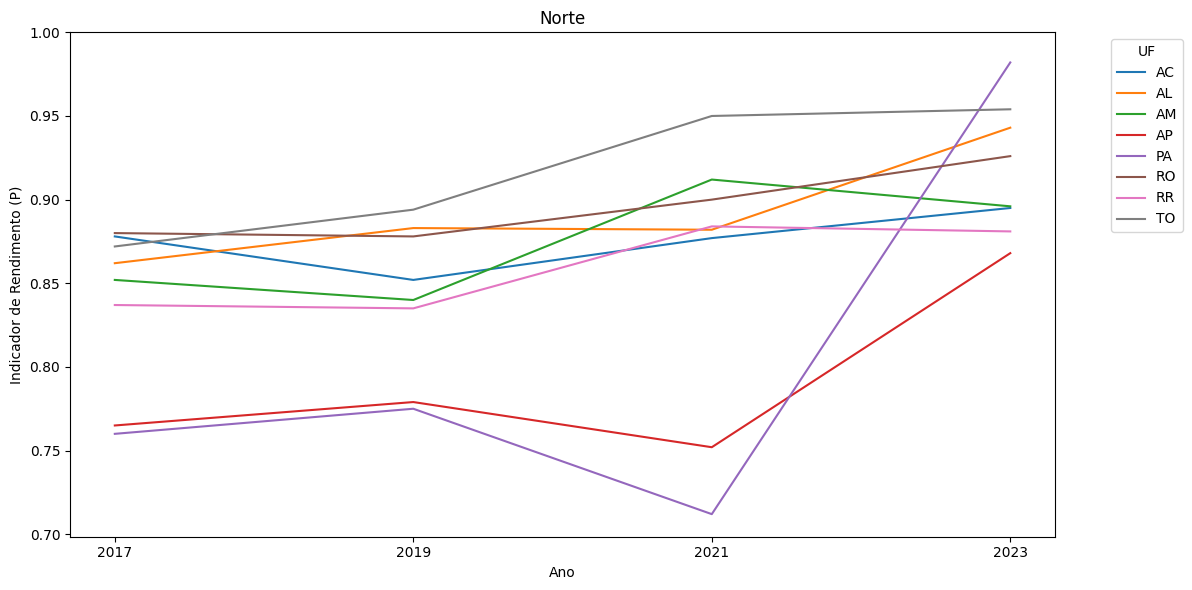

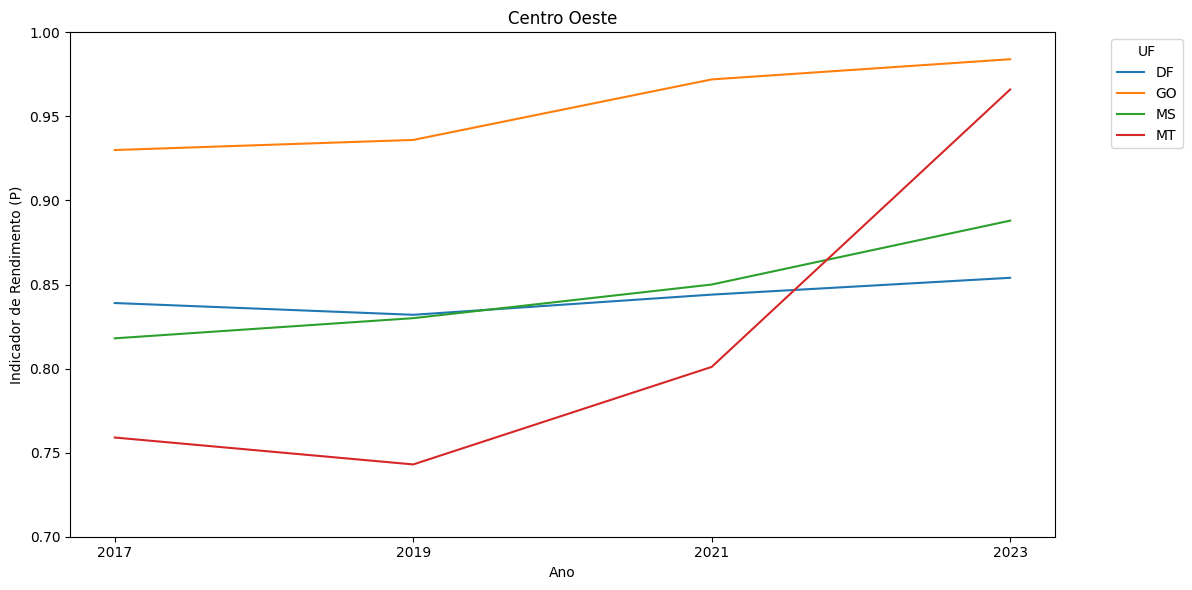

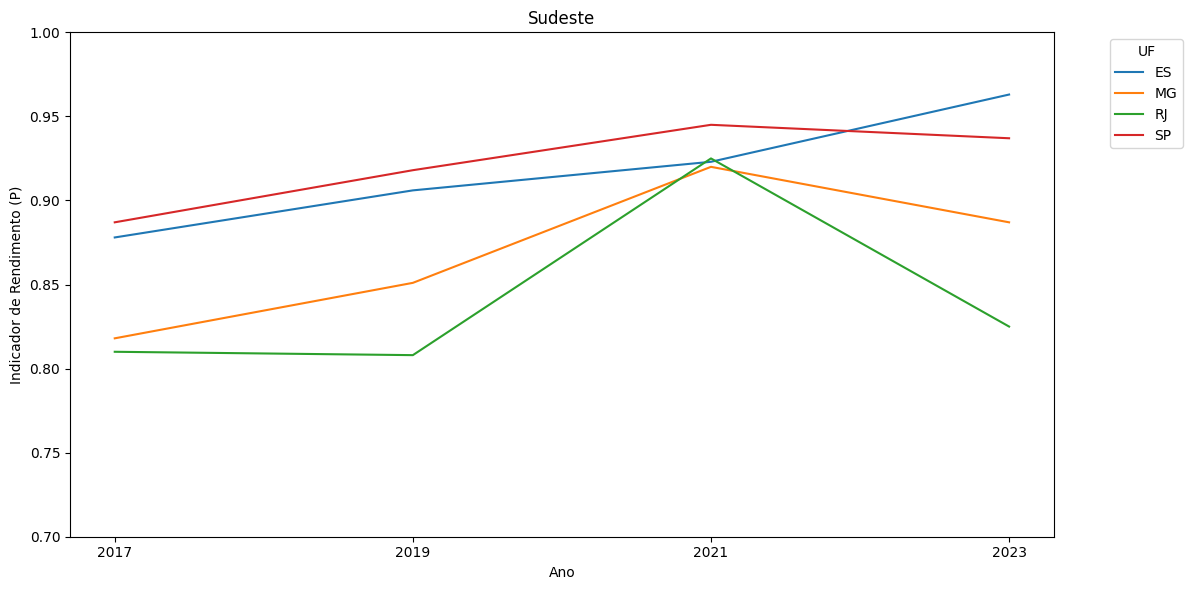

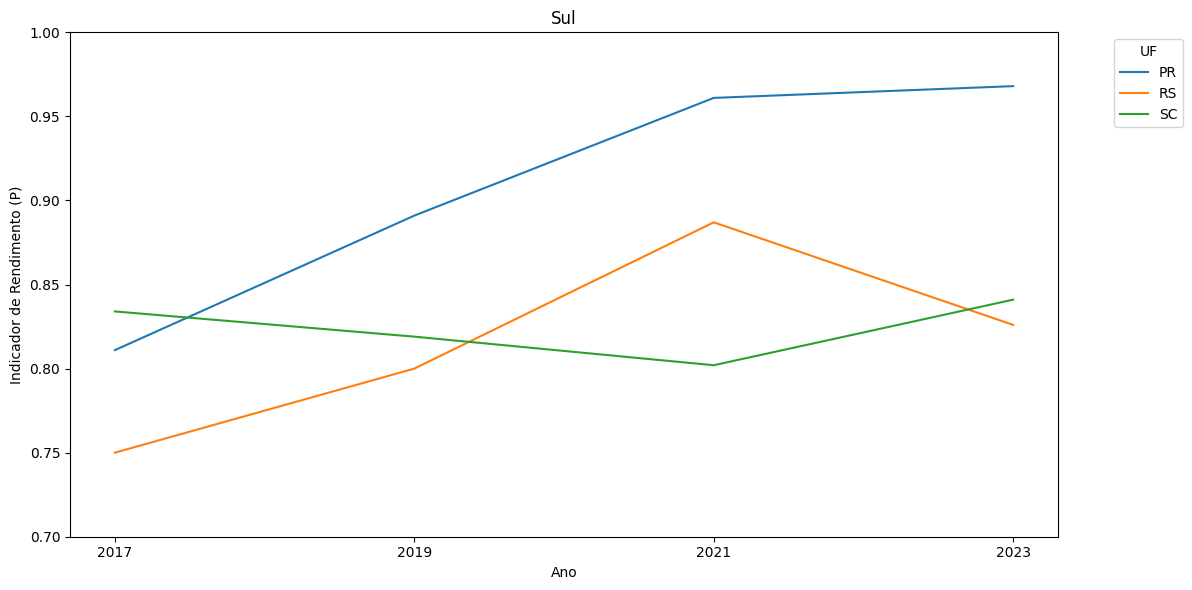

In [20]:
graficoIndicadorRend(df, 'Brasil', 'brasil')
graficoIndicadorRend(dfRegiao, 'Brasil', 'regioes')
graficoIndicadorRend(dfNordeste, 'Nordeste', 'dfNordeste')
graficoIndicadorRend(dfNorte, 'Norte', 'dfNorte')
graficoIndicadorRend(dfCentroOeste, 'Centro Oeste', 'dfCentroOeste')
graficoIndicadorRend(dfSudeste, 'Sudeste', 'dfSudeste')
graficoIndicadorRend(dfSul, 'Sul', 'dfSul')

# Media Padronizada

In [21]:
dfMediaP = df[['uf', 'saeb_Media_padronizada_2017', 
                       'saeb_Media_padronizada_2019', 
                       'saeb_Media_padronizada_2021', 
                       'saeb_Media_padronizada_2023']]

display(dfMediaP)

,uf,saeb_Media_padronizada_2017,saeb_Media_padronizada_2019,saeb_Media_padronizada_2021,saeb_Media_padronizada_2023
0,AC,4.533,4.543,4.739,4.377
1,AL,4.172,4.221,4.105,4.202
2,AM,3.999,3.994,3.967,4.068
3,AP,4.211,3.962,NaN,4.079
4,BA,4.085,4.244,4.379,4.081
5,CE,4.506,4.737,4.659,4.684
6,DF,5.602,4.944,4.759,4.612
7,ES,5.084,5.088,5.073,4.908
8,GO,4.654,4.935,4.621,4.852
9,MA,3.880,3.874,3.884,3.948


In [22]:


def graficoMediaP(df, titulo, nomeSalvarArquivo):
    # Configurar o gráfico
    plt.figure(figsize=(12, 6))

    # Plotar cada UF
    for index, row in df.iterrows():
        plt.plot(['2017', '2019', '2021', '2023'], 
                [row['saeb_Media_padronizada_2017'], 
                 row['saeb_Media_padronizada_2019'], 
                 row['saeb_Media_padronizada_2021'], 
                 row['saeb_Media_padronizada_2023']],
                label=row['uf'])

    # Adicionar títulos e labels
    plt.title(titulo)
    plt.xlabel('Ano')
    plt.ylabel('Média Padronizada')
    plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.yticks(np.arange(3.5,6,0.5))

    # Ajustar o layout
    plt.tight_layout()

    nome = 'graficos/uf/' + 'linha'+ 'MediaP' +nomeSalvarArquivo + tipodoaquivo
    plt.savefig(nome, dpi=300, bbox_inches = "tight")
    # Mostrar o gráfico
    plt.show()

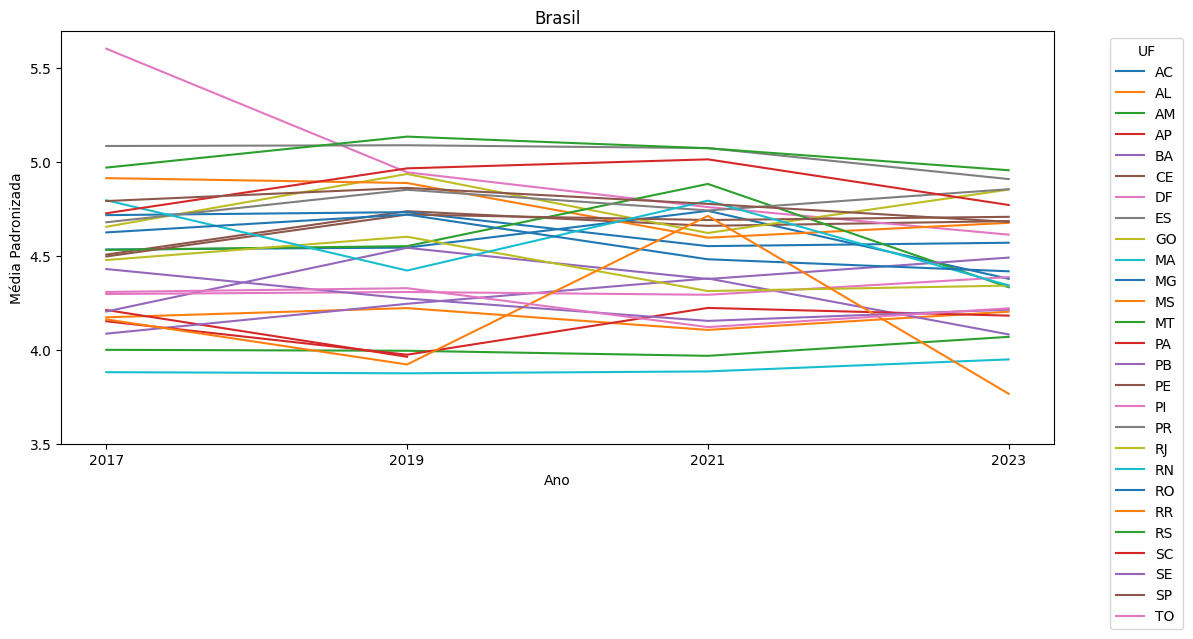

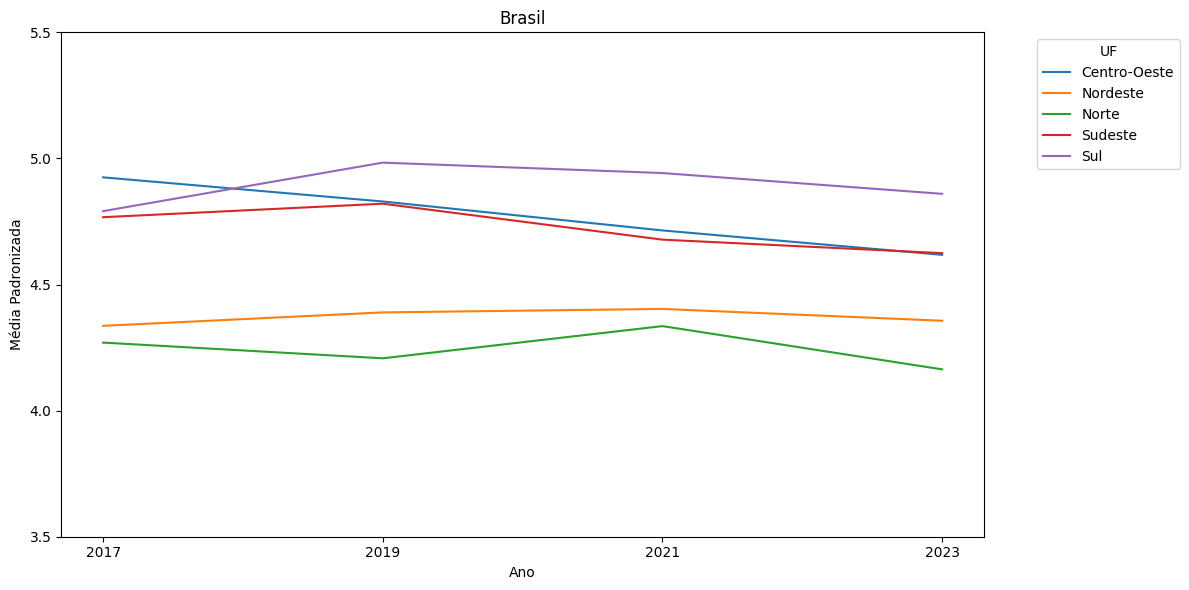

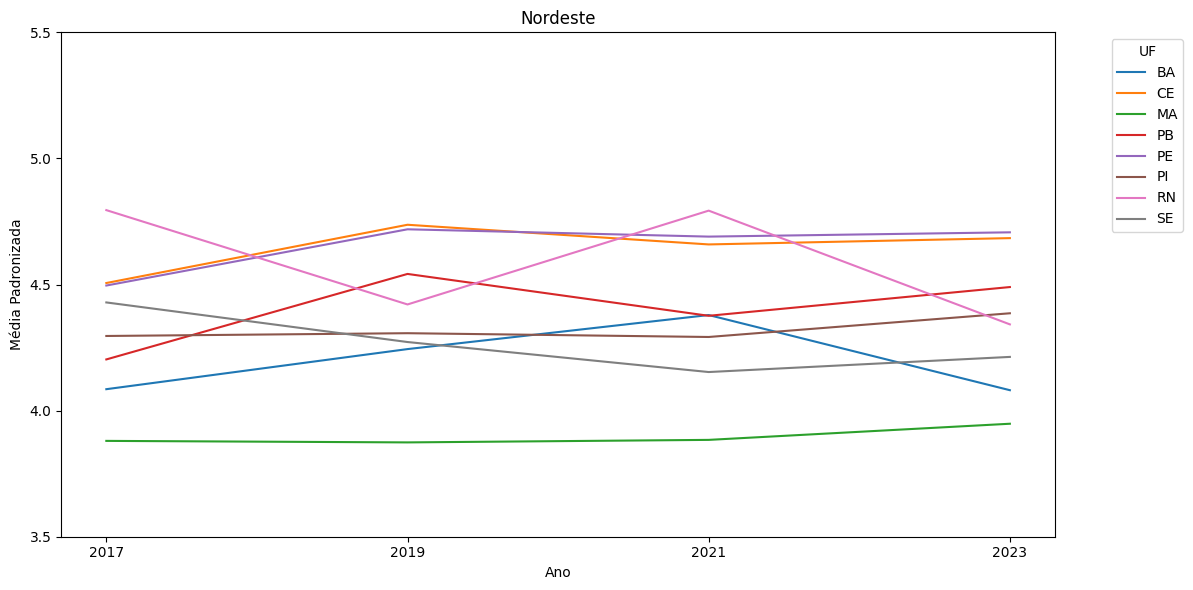

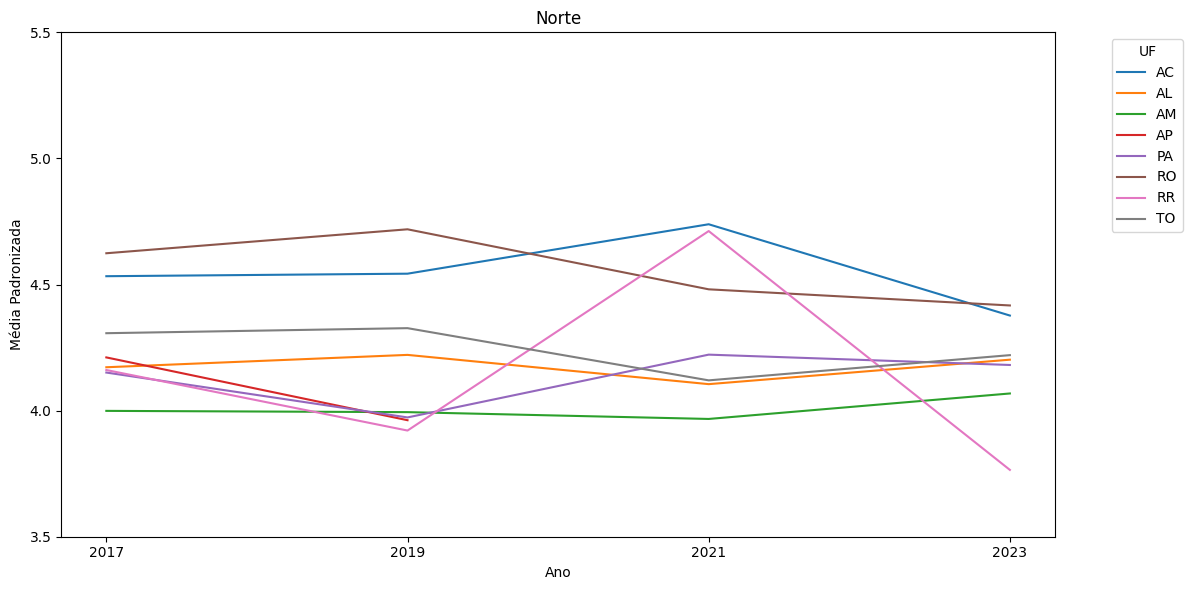

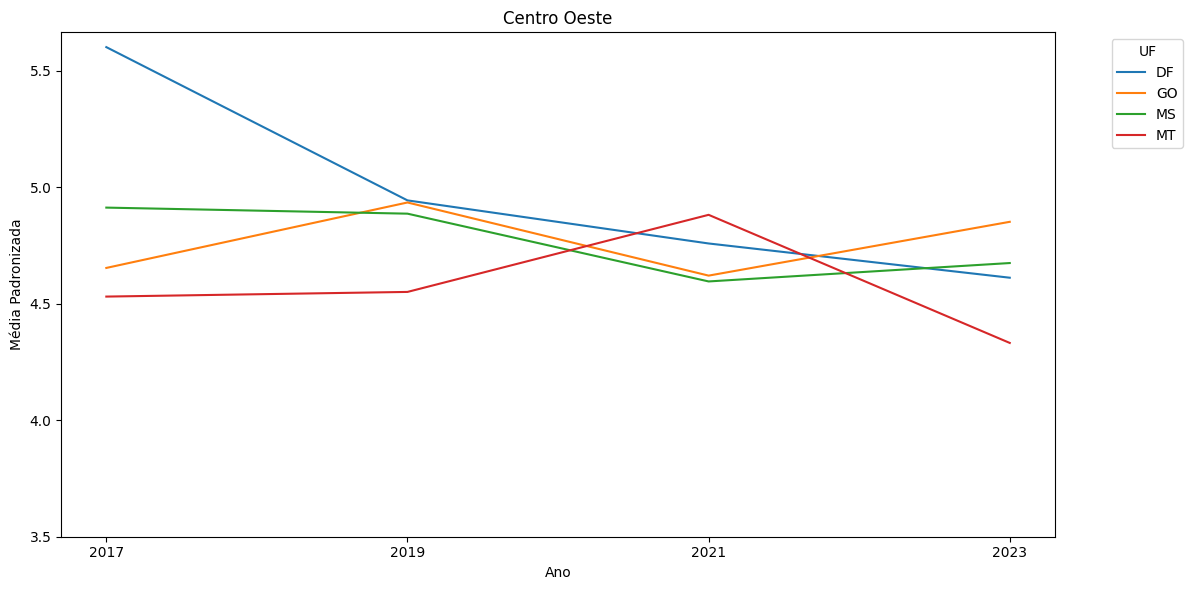

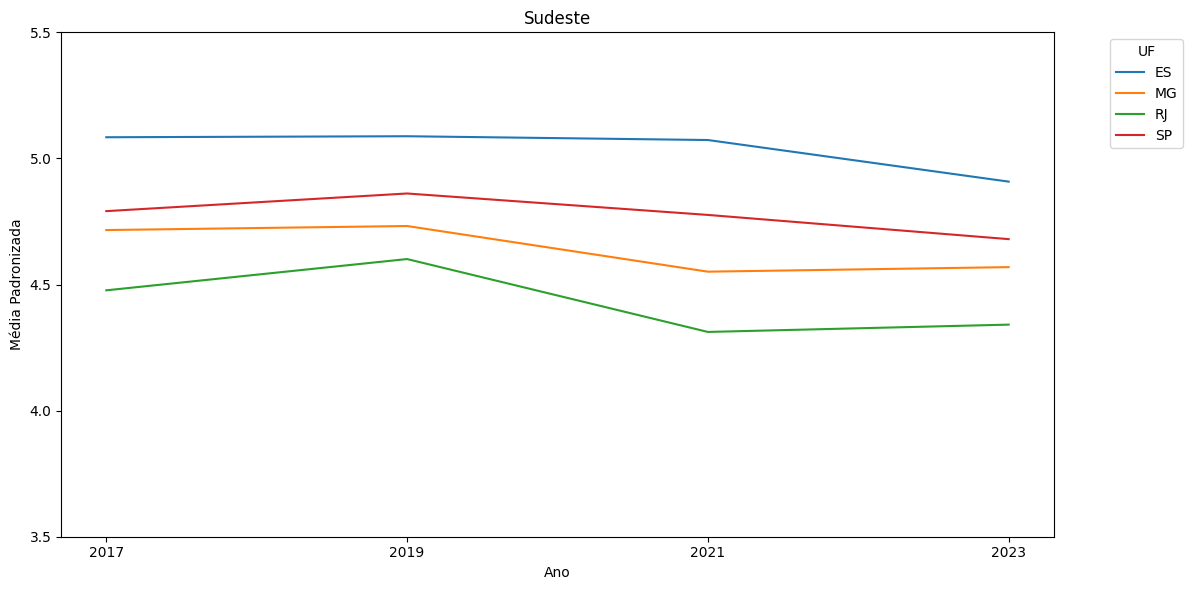

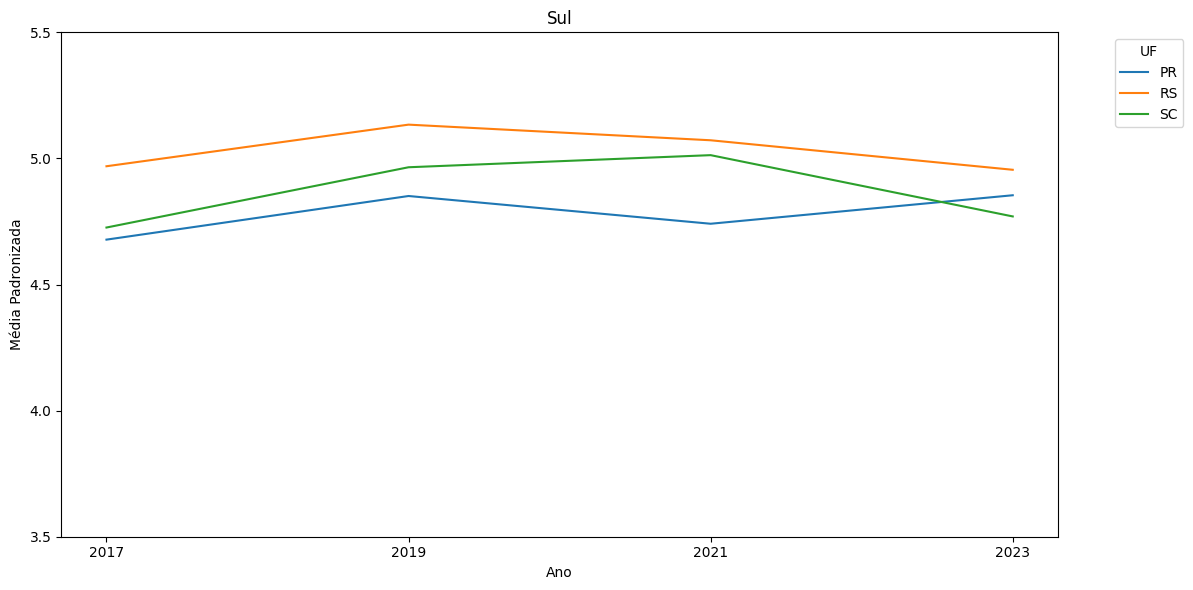

In [23]:
graficoMediaP(df, 'Brasil', 'brasil')
graficoMediaP(dfRegiao, 'Brasil', 'Regiões')
graficoMediaP(dfNordeste, 'Nordeste', 'dfNordeste')
graficoMediaP(dfNorte, 'Norte', 'dfNorte')
graficoMediaP(dfCentroOeste, 'Centro Oeste', 'dfCentroOeste')
graficoMediaP(dfSudeste, 'Sudeste', 'dfSudeste')
graficoMediaP(dfSul, 'Sul', 'dfSul')

# Saeb MAT e PORT e MATxPORT

### MAT

In [24]:
dfMediaMat = df[['uf', 'saeb_Mat_2017', 
                       'saeb_Mat_2019', 
                       'saeb_Mat_2021', 
                       'saeb_Mat_2023']]



display(dfMediaMat)

def graficoMediaMat(df, titulo, nomeSalvarArquivo):
    # Configurar o gráfico
    plt.figure(figsize=(12, 6))

    # Plotar cada UF
    for index, row in df.iterrows():
        plt.plot(['2017', '2019', '2021', '2023'], 
                [row['saeb_Mat_2017'], 
                 row['saeb_Mat_2019'], 
                 row['saeb_Mat_2021'], 
                 row['saeb_Mat_2023']],
                label=row['uf'])

    # Adicionar títulos e labels
    plt.title(titulo)
    plt.xlabel('Ano')
    plt.ylabel('Média Matemática')
    plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.yticks(np.arange(240,320,10))

    # Ajustar o layout
    plt.tight_layout()

    nome = 'graficos/uf/' + 'linha'+ 'MédiaMatemática' +nomeSalvarArquivo + tipodoaquivo
    plt.savefig(nome, dpi=300, bbox_inches = "tight")
    # Mostrar o gráfico
    plt.show()

,uf,saeb_Mat_2017,saeb_Mat_2019,saeb_Mat_2021,saeb_Mat_2023
0,AC,270.794,269.783,274.204,263.566
1,AL,258.418,257.091,252.255,258.430
2,AM,251.678,249.049,246.650,252.807
3,AP,257.782,248.003,NaN,250.412
4,BA,255.706,258.458,262.007,252.924
5,CE,270.350,275.976,271.651,274.246
6,DF,313.666,282.481,276.721,270.116
7,ES,293.999,291.842,291.960,282.890
8,GO,275.740,283.498,271.317,279.804
9,MA,247.164,244.246,243.135,248.866


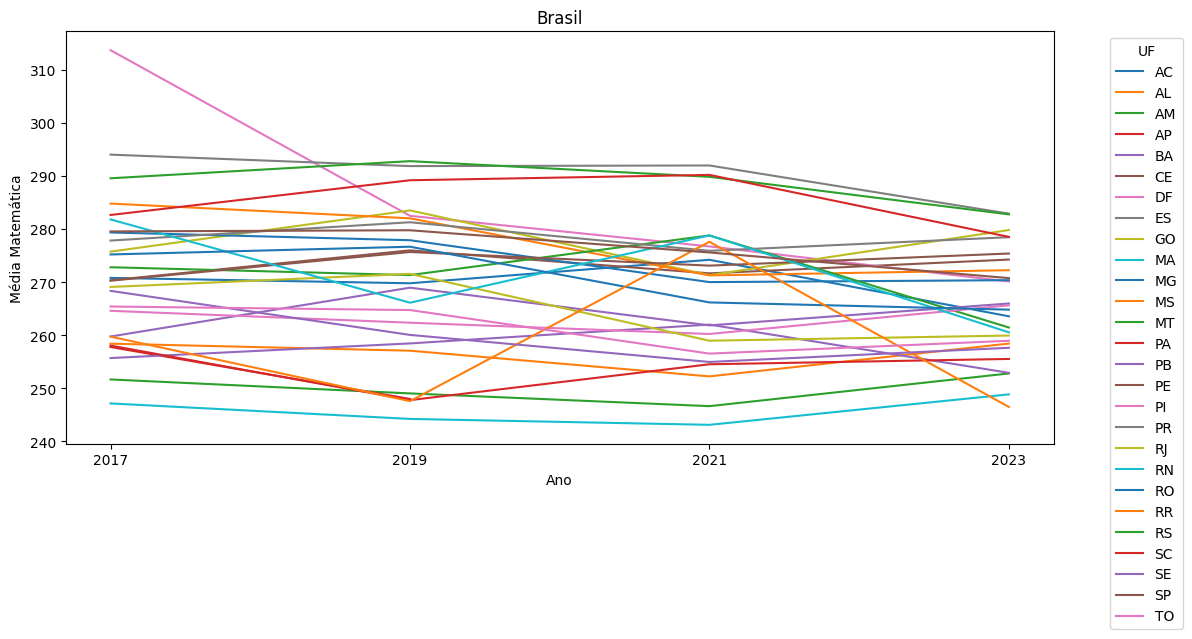

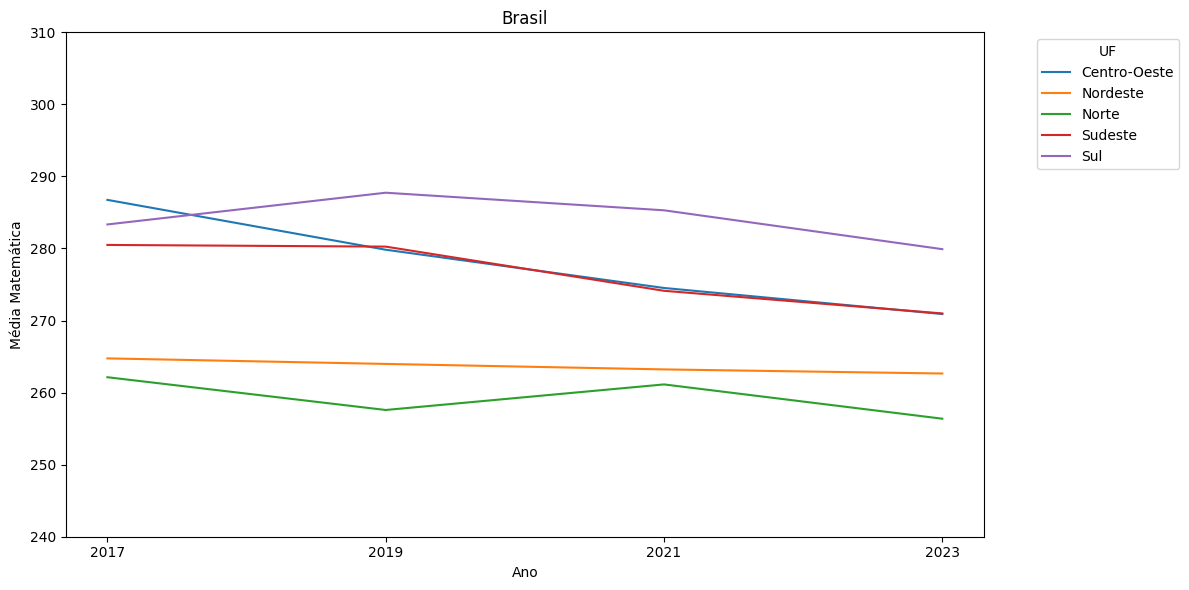

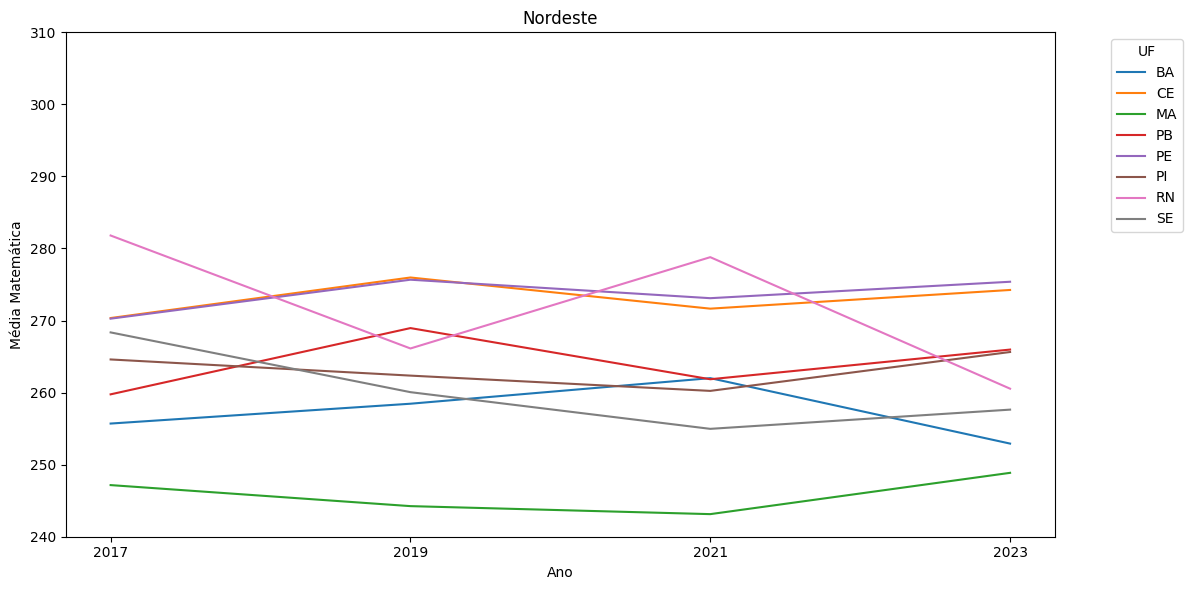

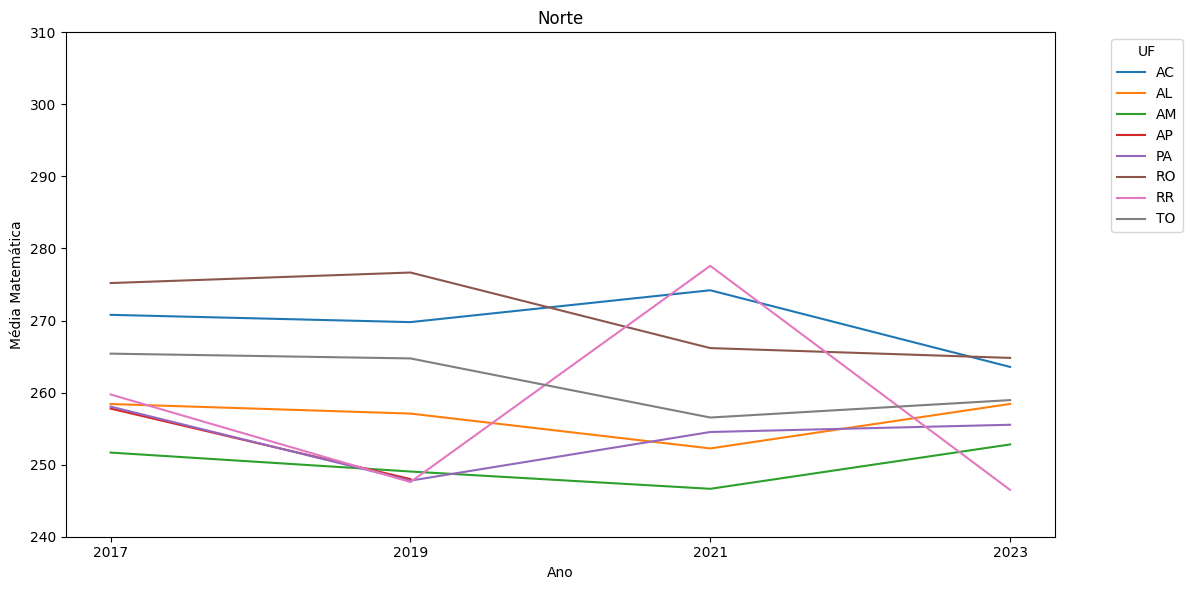

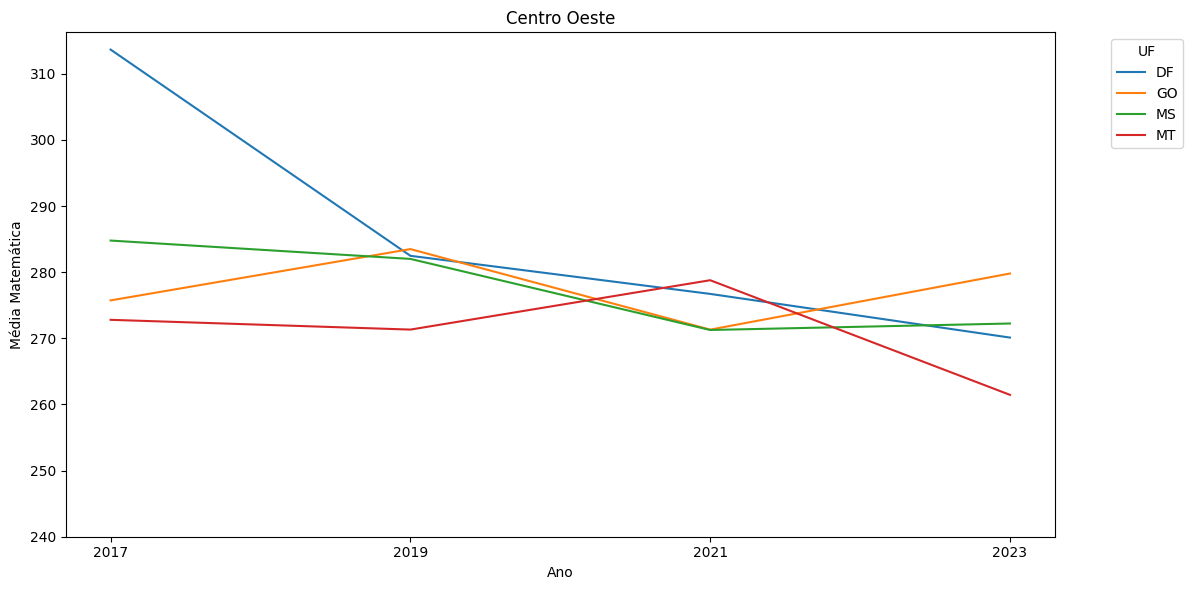

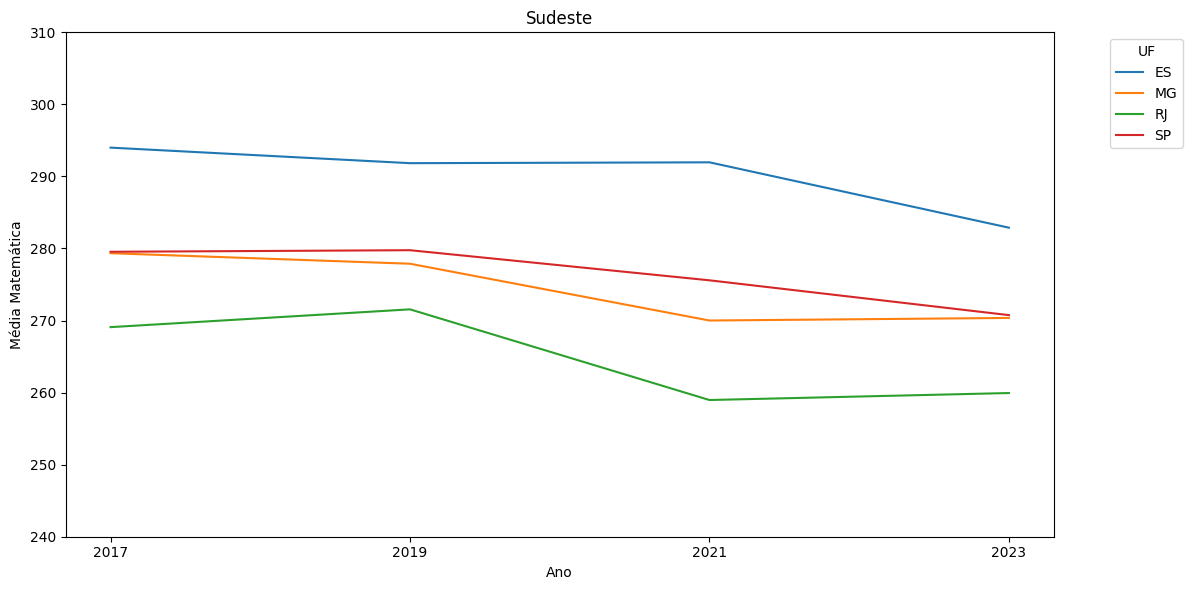

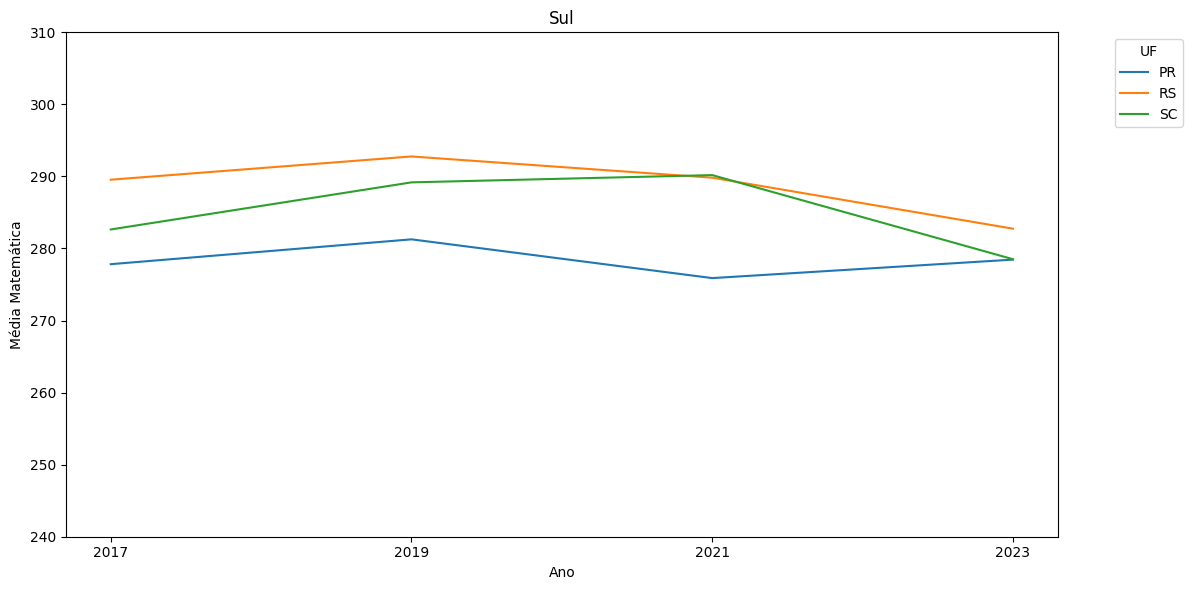

In [25]:
graficoMediaMat(df, 'Brasil', 'brasil')
graficoMediaMat(dfRegiao, 'Brasil', 'Regiões')
graficoMediaMat(dfNordeste, 'Nordeste', 'dfNordeste')
graficoMediaMat(dfNorte, 'Norte', 'dfNorte')
graficoMediaMat(dfCentroOeste, 'Centro Oeste', 'dfCentroOeste')
graficoMediaMat(dfSudeste, 'Sudeste', 'dfSudeste')
graficoMediaMat(dfSul, 'Sul', 'dfSul')

### PORT

In [26]:
dfMediaPort = df[['uf', 'saeb_Port_2017', 
                       'saeb_Port_2019', 
                       'saeb_Port_2021', 
                       'saeb_Port_2023']]

display(dfMediaPort)

def graficoMediaPort(df, titulo, nomeSalvarArquivo):
    # Configurar o gráfico
    plt.figure(figsize=(12, 6))

    # Plotar cada UF
    for index, row in df.iterrows():
        plt.plot(['2017', '2019', '2021', '2023'], 
                [row['saeb_Port_2017'], 
                 row['saeb_Port_2019'], 
                 row['saeb_Port_2021'], 
                 row['saeb_Port_2023']],
                label=row['uf'])

    # Adicionar títulos e labels
    plt.title(titulo)
    plt.xlabel('Ano')
    plt.ylabel('Média Matemática')
    plt.legend(title='UF', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.yticks(np.arange(240,320,10))

    # Ajustar o layout
    plt.tight_layout()

    nome = 'graficos/uf/' + 'linha'+ 'MédiaPortugues' +nomeSalvarArquivo + tipodoaquivo
    plt.savefig(nome, dpi=300, bbox_inches = "tight")
    # Mostrar o gráfico
    plt.show()

,uf,saeb_Port_2017,saeb_Port_2019,saeb_Port_2021,saeb_Port_2023
0,AC,269.868,271.527,280.469,266.258
1,AL,257.395,261.925,258.673,259.378
2,AM,252.165,254.277,254.740,255.731
3,AP,260.616,253.133,NaN,258.657
4,BA,254.083,262.122,267.828,256.475
5,CE,268.530,278.671,277.485,276.733
6,DF,301.059,286.394,279.417,275.822
7,ES,284.902,287.186,286.098,283.565
8,GO,273.324,284.800,275.260,282.744
9,MA,248.407,250.740,252.476,251.401


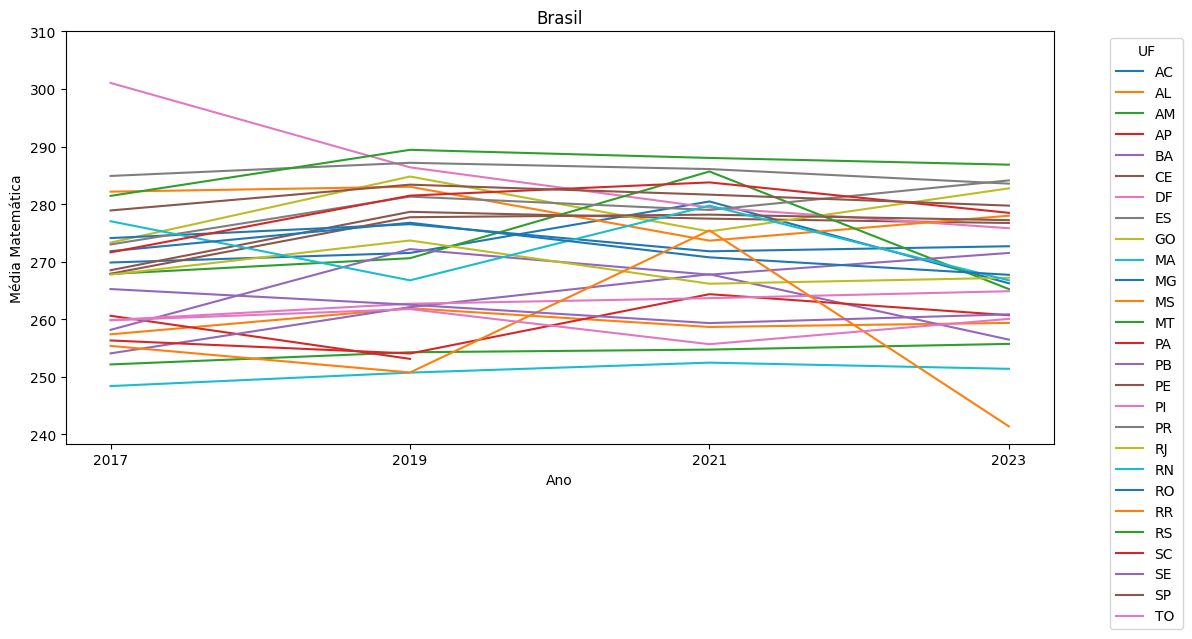

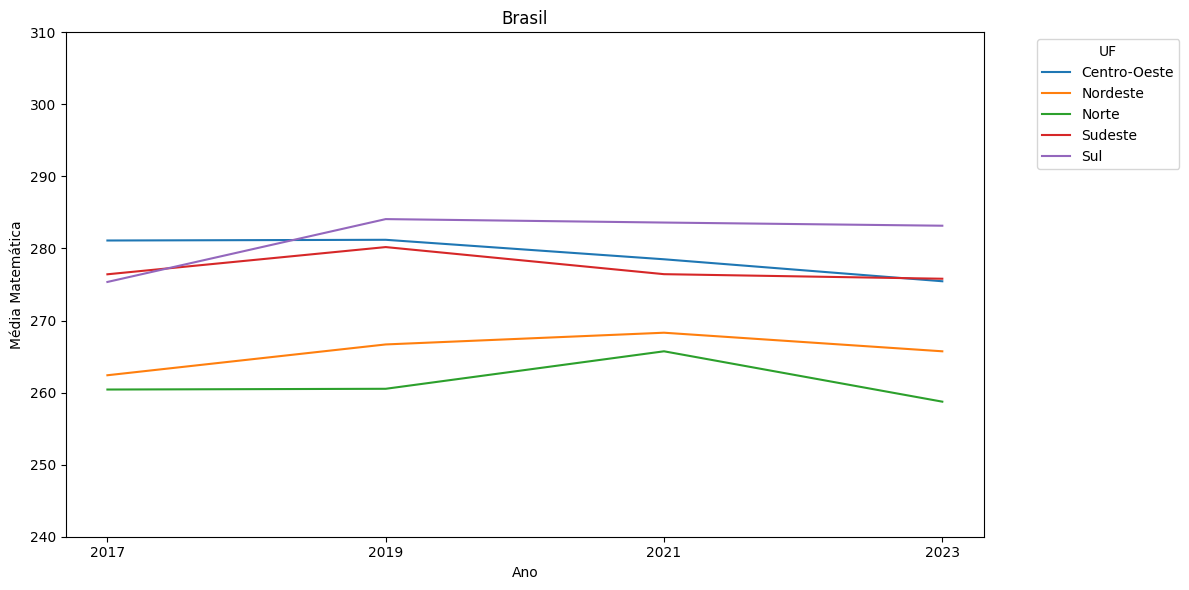

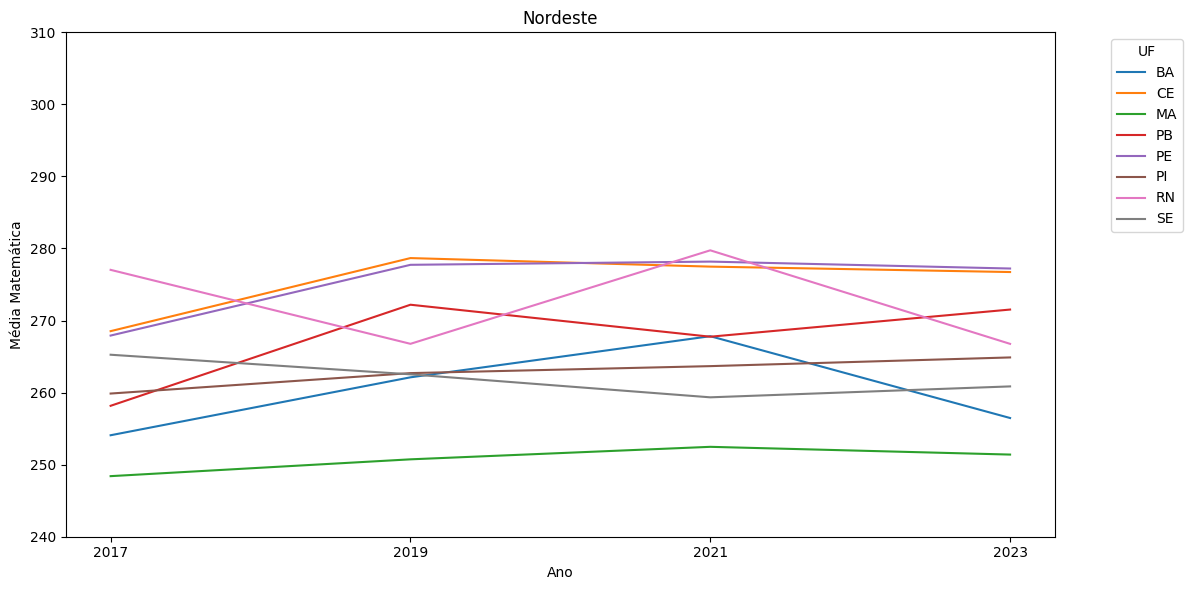

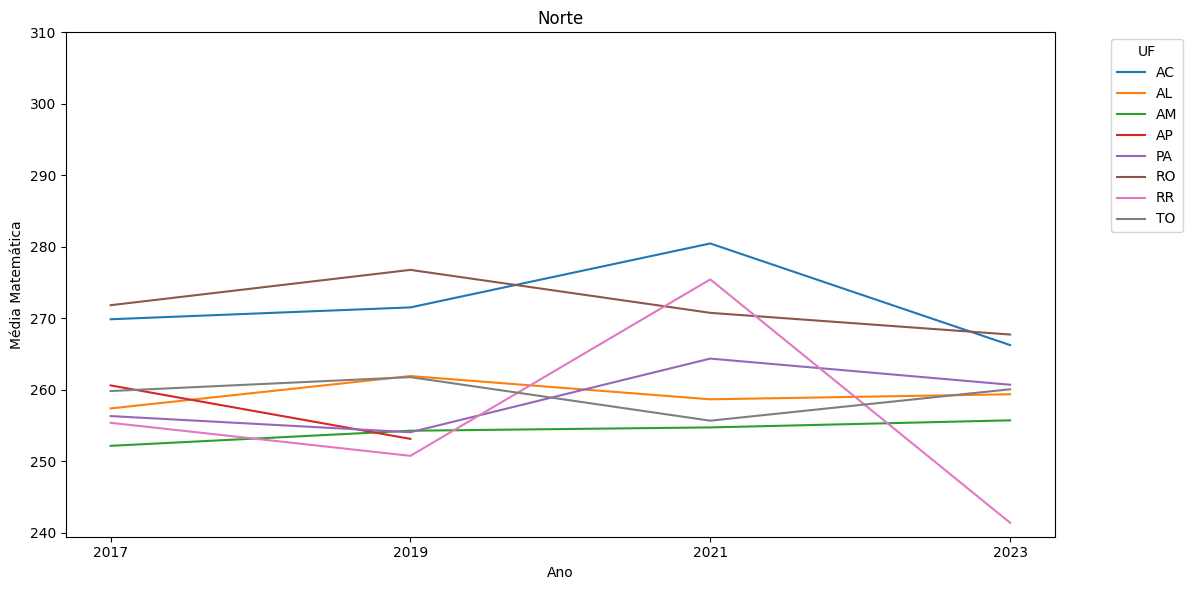

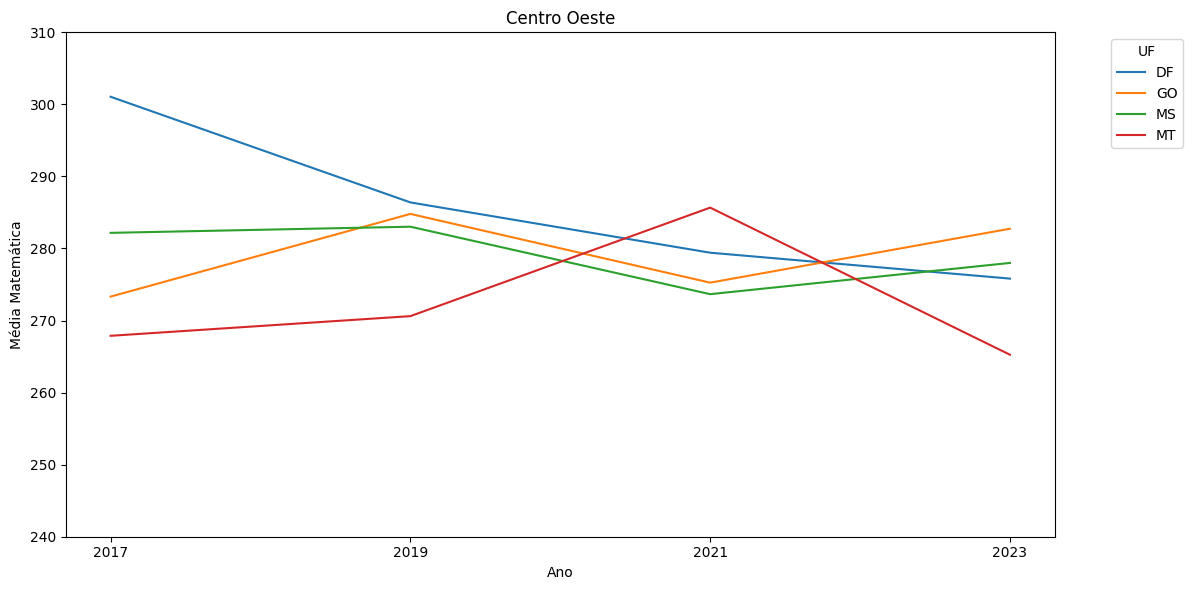

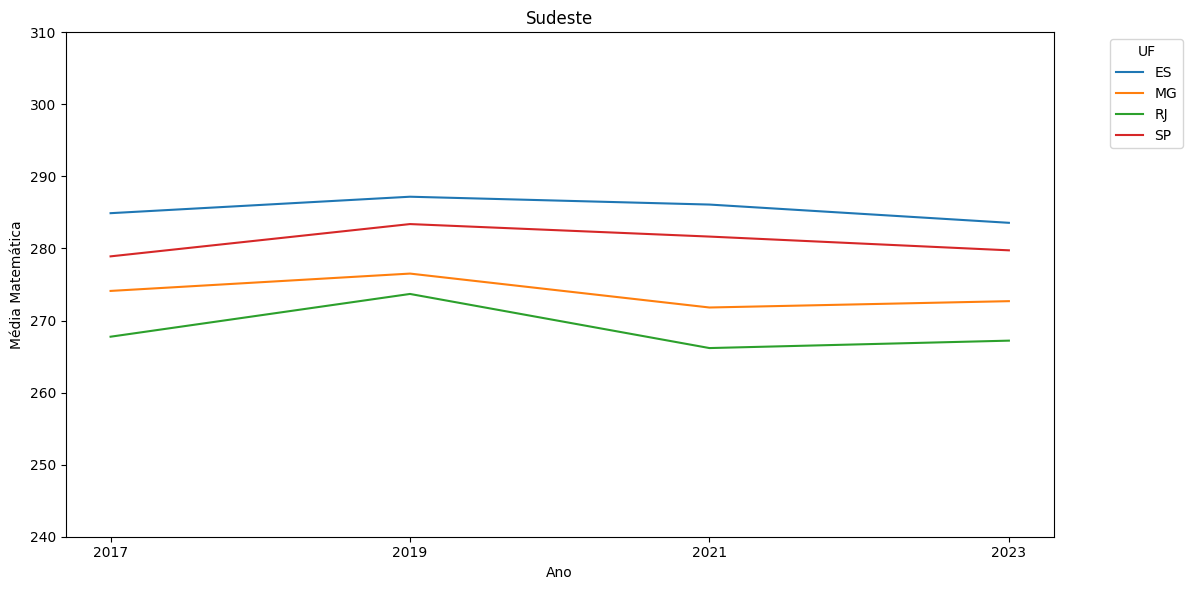

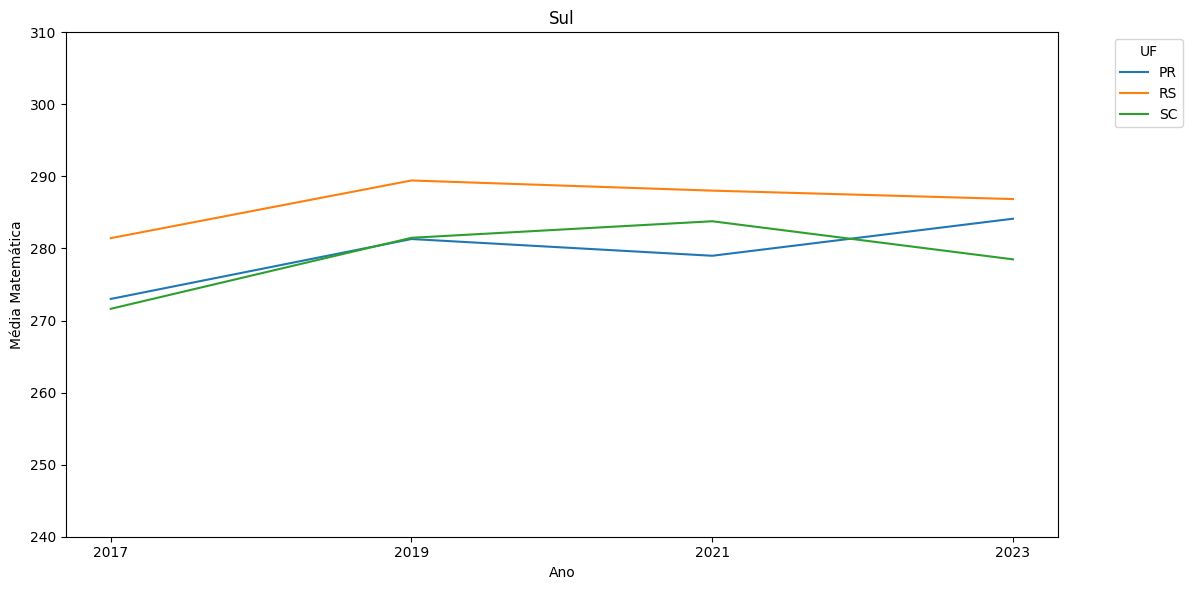

In [27]:
graficoMediaPort(df, 'Brasil', 'brasil')
graficoMediaPort(dfRegiao, 'Brasil', 'Regiões')
graficoMediaPort(dfNordeste, 'Nordeste', 'dfNordeste')
graficoMediaPort(dfNorte, 'Norte', 'dfNorte')
graficoMediaPort(dfCentroOeste, 'Centro Oeste', 'dfCentroOeste')
graficoMediaPort(dfSudeste, 'Sudeste', 'dfSudeste')
graficoMediaPort(dfSul, 'Sul', 'dfSul')